# Load

In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from scipy.sparse import diags
from scipy.io import mmwrite
from scipy import sparse
from scipy.optimize import fsolve,minimize
from tqdm import tqdm
from pathlib import Path
from typing import Union, Optional
import pickle
import seaborn as sns

In [4]:
from SCCAF import *

In [5]:
import matplotlib.colors as mcolors

In [6]:
from scipy.sparse import csr_matrix

In [7]:
from scDenorm.denorm import *

In [8]:
from scAnnot.tools import *

In [9]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"

# Before scDenorm

In [52]:
ad=sc.read('results/skin.h5ad')

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [346]:
ad.X=ad.layers['counts'].copy()

In [347]:
ad.X.data

array([2., 1., 2., ..., 1., 3., 1.], dtype=float32)

In [348]:
ad_sub=ad[ad.obs['age'].isin(['YOUNG'])].copy()
ad_ref=ad[ad.obs['age'].isin(['OLD'])].copy()

In [349]:
sc.pp.normalize_total(ad_sub, target_sum=1e3)
sc.pp.log1p(ad_sub)

In [350]:
sc.pp.normalize_total(ad_ref, target_sum=1e4)
sc.pp.log1p(ad_ref)

In [23]:
ad_sub

AnnData object with n_obs × n_vars = 5454 × 21352
    obs: 'nCount_RNA', 'nFeature_RNA', 'subj', 'percent.mito', 'age', 'ClusterNum', 'ClusterNum_Age', 'ClusterNum_Celltype_and_Age', 'Celltype', 'Celltype_and_Age'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Celltype_and_Age_colors', 'Celltype_colors', 'ClusterNum_Age_colors', 'ClusterNum_Celltype_and_Age_colors', 'age_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'subj_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [24]:
ad_ref

AnnData object with n_obs × n_vars = 10003 × 21352
    obs: 'nCount_RNA', 'nFeature_RNA', 'subj', 'percent.mito', 'age', 'ClusterNum', 'ClusterNum_Age', 'ClusterNum_Celltype_and_Age', 'Celltype', 'Celltype_and_Age'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Celltype_and_Age_colors', 'Celltype_colors', 'ClusterNum_Age_colors', 'ClusterNum_Celltype_and_Age_colors', 'age_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'subj_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [351]:
ad3=ad_ref.concatenate(ad_sub)

/tmp/ipykernel_67842/1618515332.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  ad3=ad_ref.concatenate(ad_sub)


In [26]:
ad3.X.data

array([2.1333666 , 1.5521525 , 1.5521525 , ..., 0.54319644, 0.54319644,
       0.54319644], dtype=float32)

In [47]:
sc.pp.highly_variable_genes(
    ad3,
    #flavor= 'seurat_v3',
    n_top_genes=2000,
    batch_key='sample',
    subset=False)

In [48]:
ad3.var.highly_variable.sum()

2000

In [368]:
sc.tl.pca(ad3, svd_solver='arpack', use_highly_variable=True)
sc.pp.neighbors(ad3)
sc.tl.umap(ad3)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


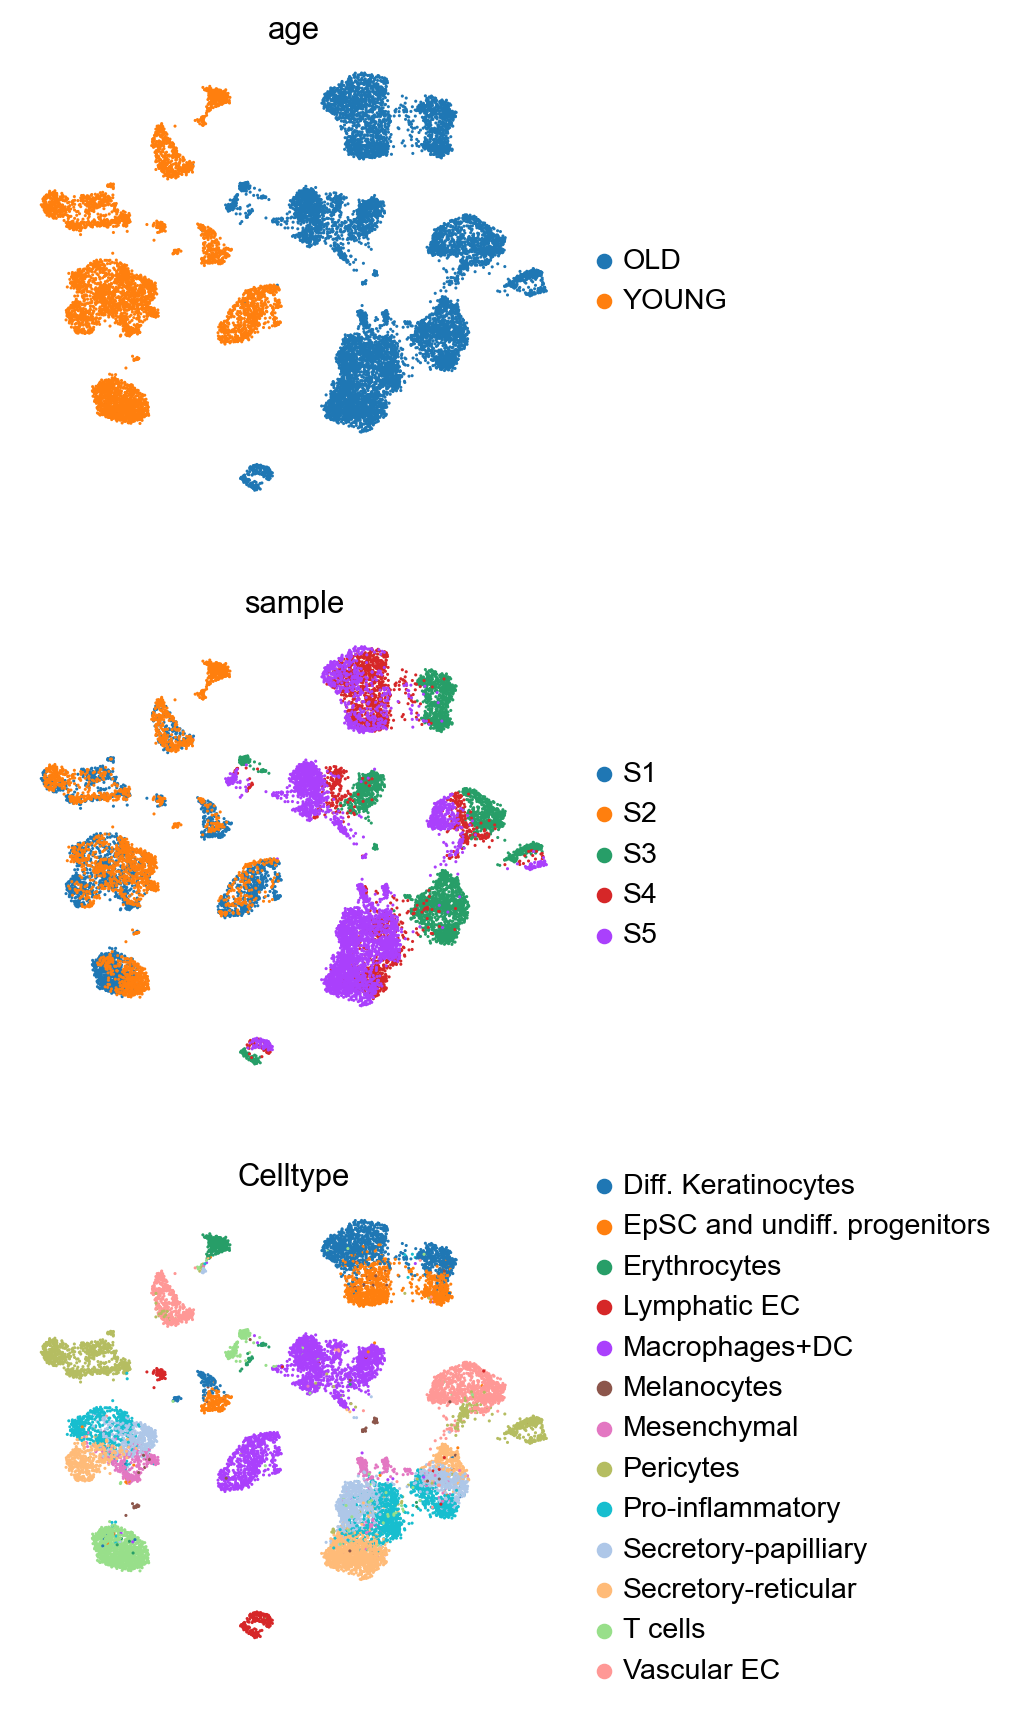

In [369]:
figsize(4,4)
sc.pl.umap(ad3, color=['age','sample','Celltype'],ncols=1)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


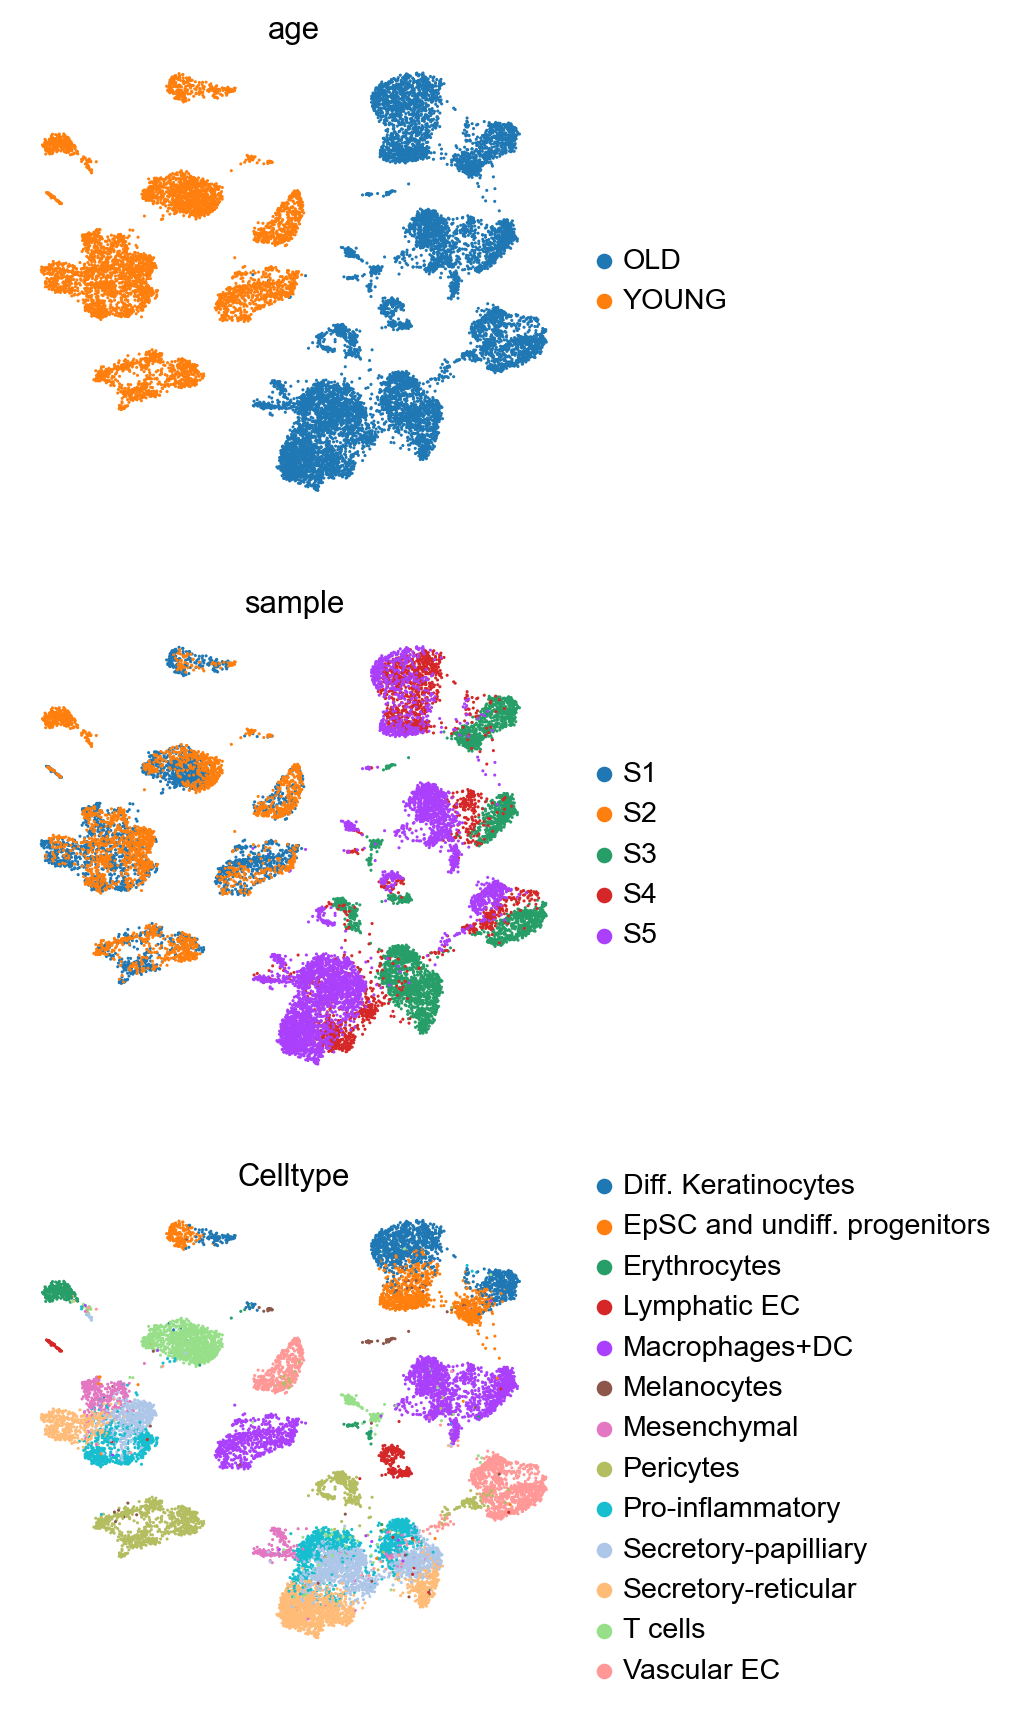

In [50]:
sc.pl.umap(ad3, color=['age','sample','Celltype'],ncols=1)

In [370]:
ad3.obsm['X_umap_raw']=ad3.obsm['X_umap']

In [425]:
sc.external.pp.harmony_integrate(ad3, key = ['age','sample'])

2024-07-31 13:03:12,603 - harmonypy - INFO - Iteration 1 of 10
2024-07-31 13:03:26,801 - harmonypy - INFO - Iteration 2 of 10
2024-07-31 13:03:39,748 - harmonypy - INFO - Iteration 3 of 10
2024-07-31 13:03:50,164 - harmonypy - INFO - Iteration 4 of 10
2024-07-31 13:04:02,834 - harmonypy - INFO - Iteration 5 of 10
2024-07-31 13:04:12,964 - harmonypy - INFO - Converged after 5 iterations


In [426]:
ad3.obsm['X_umap_1']=ad3.obsm['X_umap']

In [427]:
sc.pp.neighbors(ad3, use_rep='X_pca_harmony')
sc.tl.umap(ad3)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


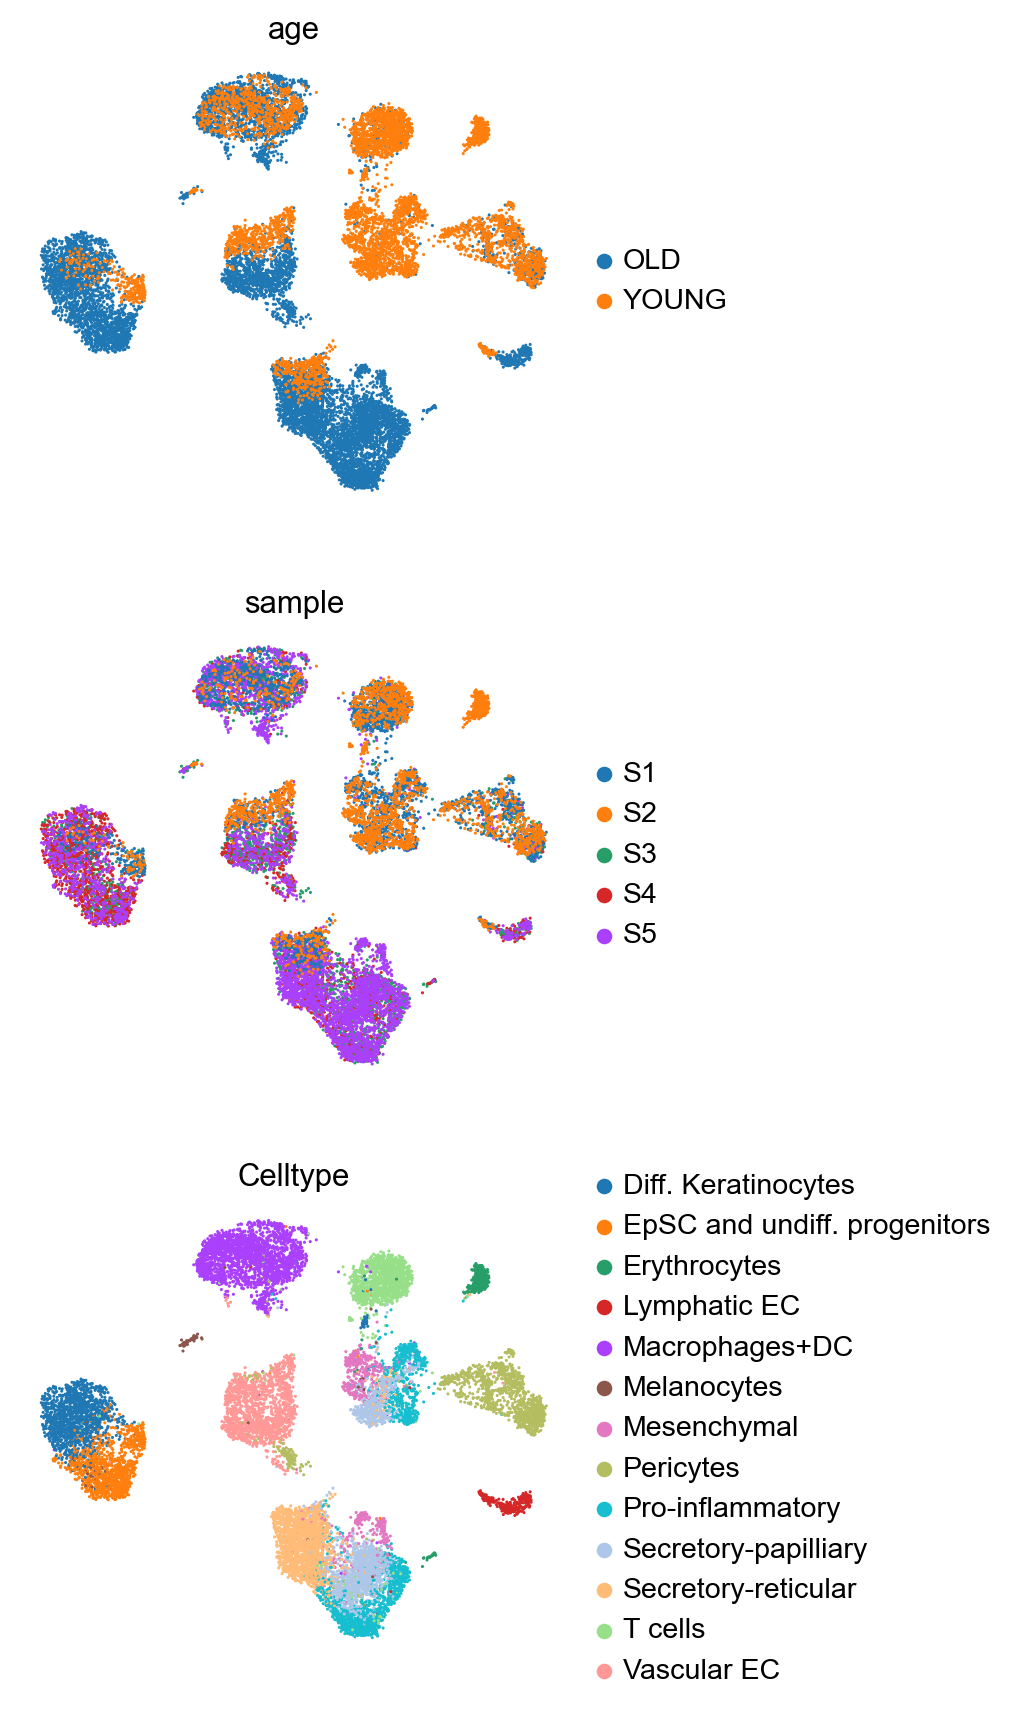

In [428]:
sc.pl.umap(ad3, color=['age','sample','Celltype'],ncols=1)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping prov

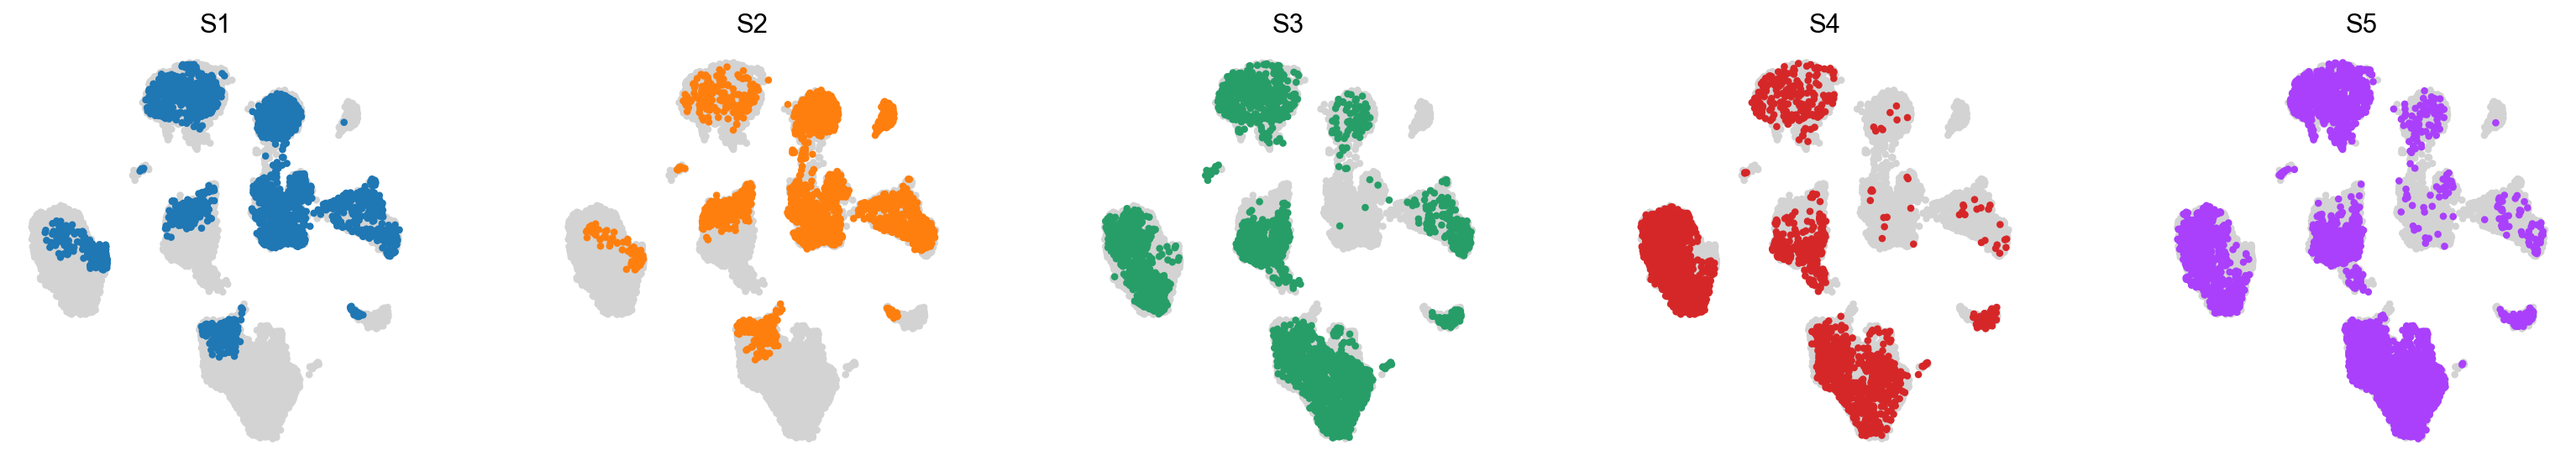

In [430]:
cluster_small_multiples(ad3,'sample',ncols=5)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping prov

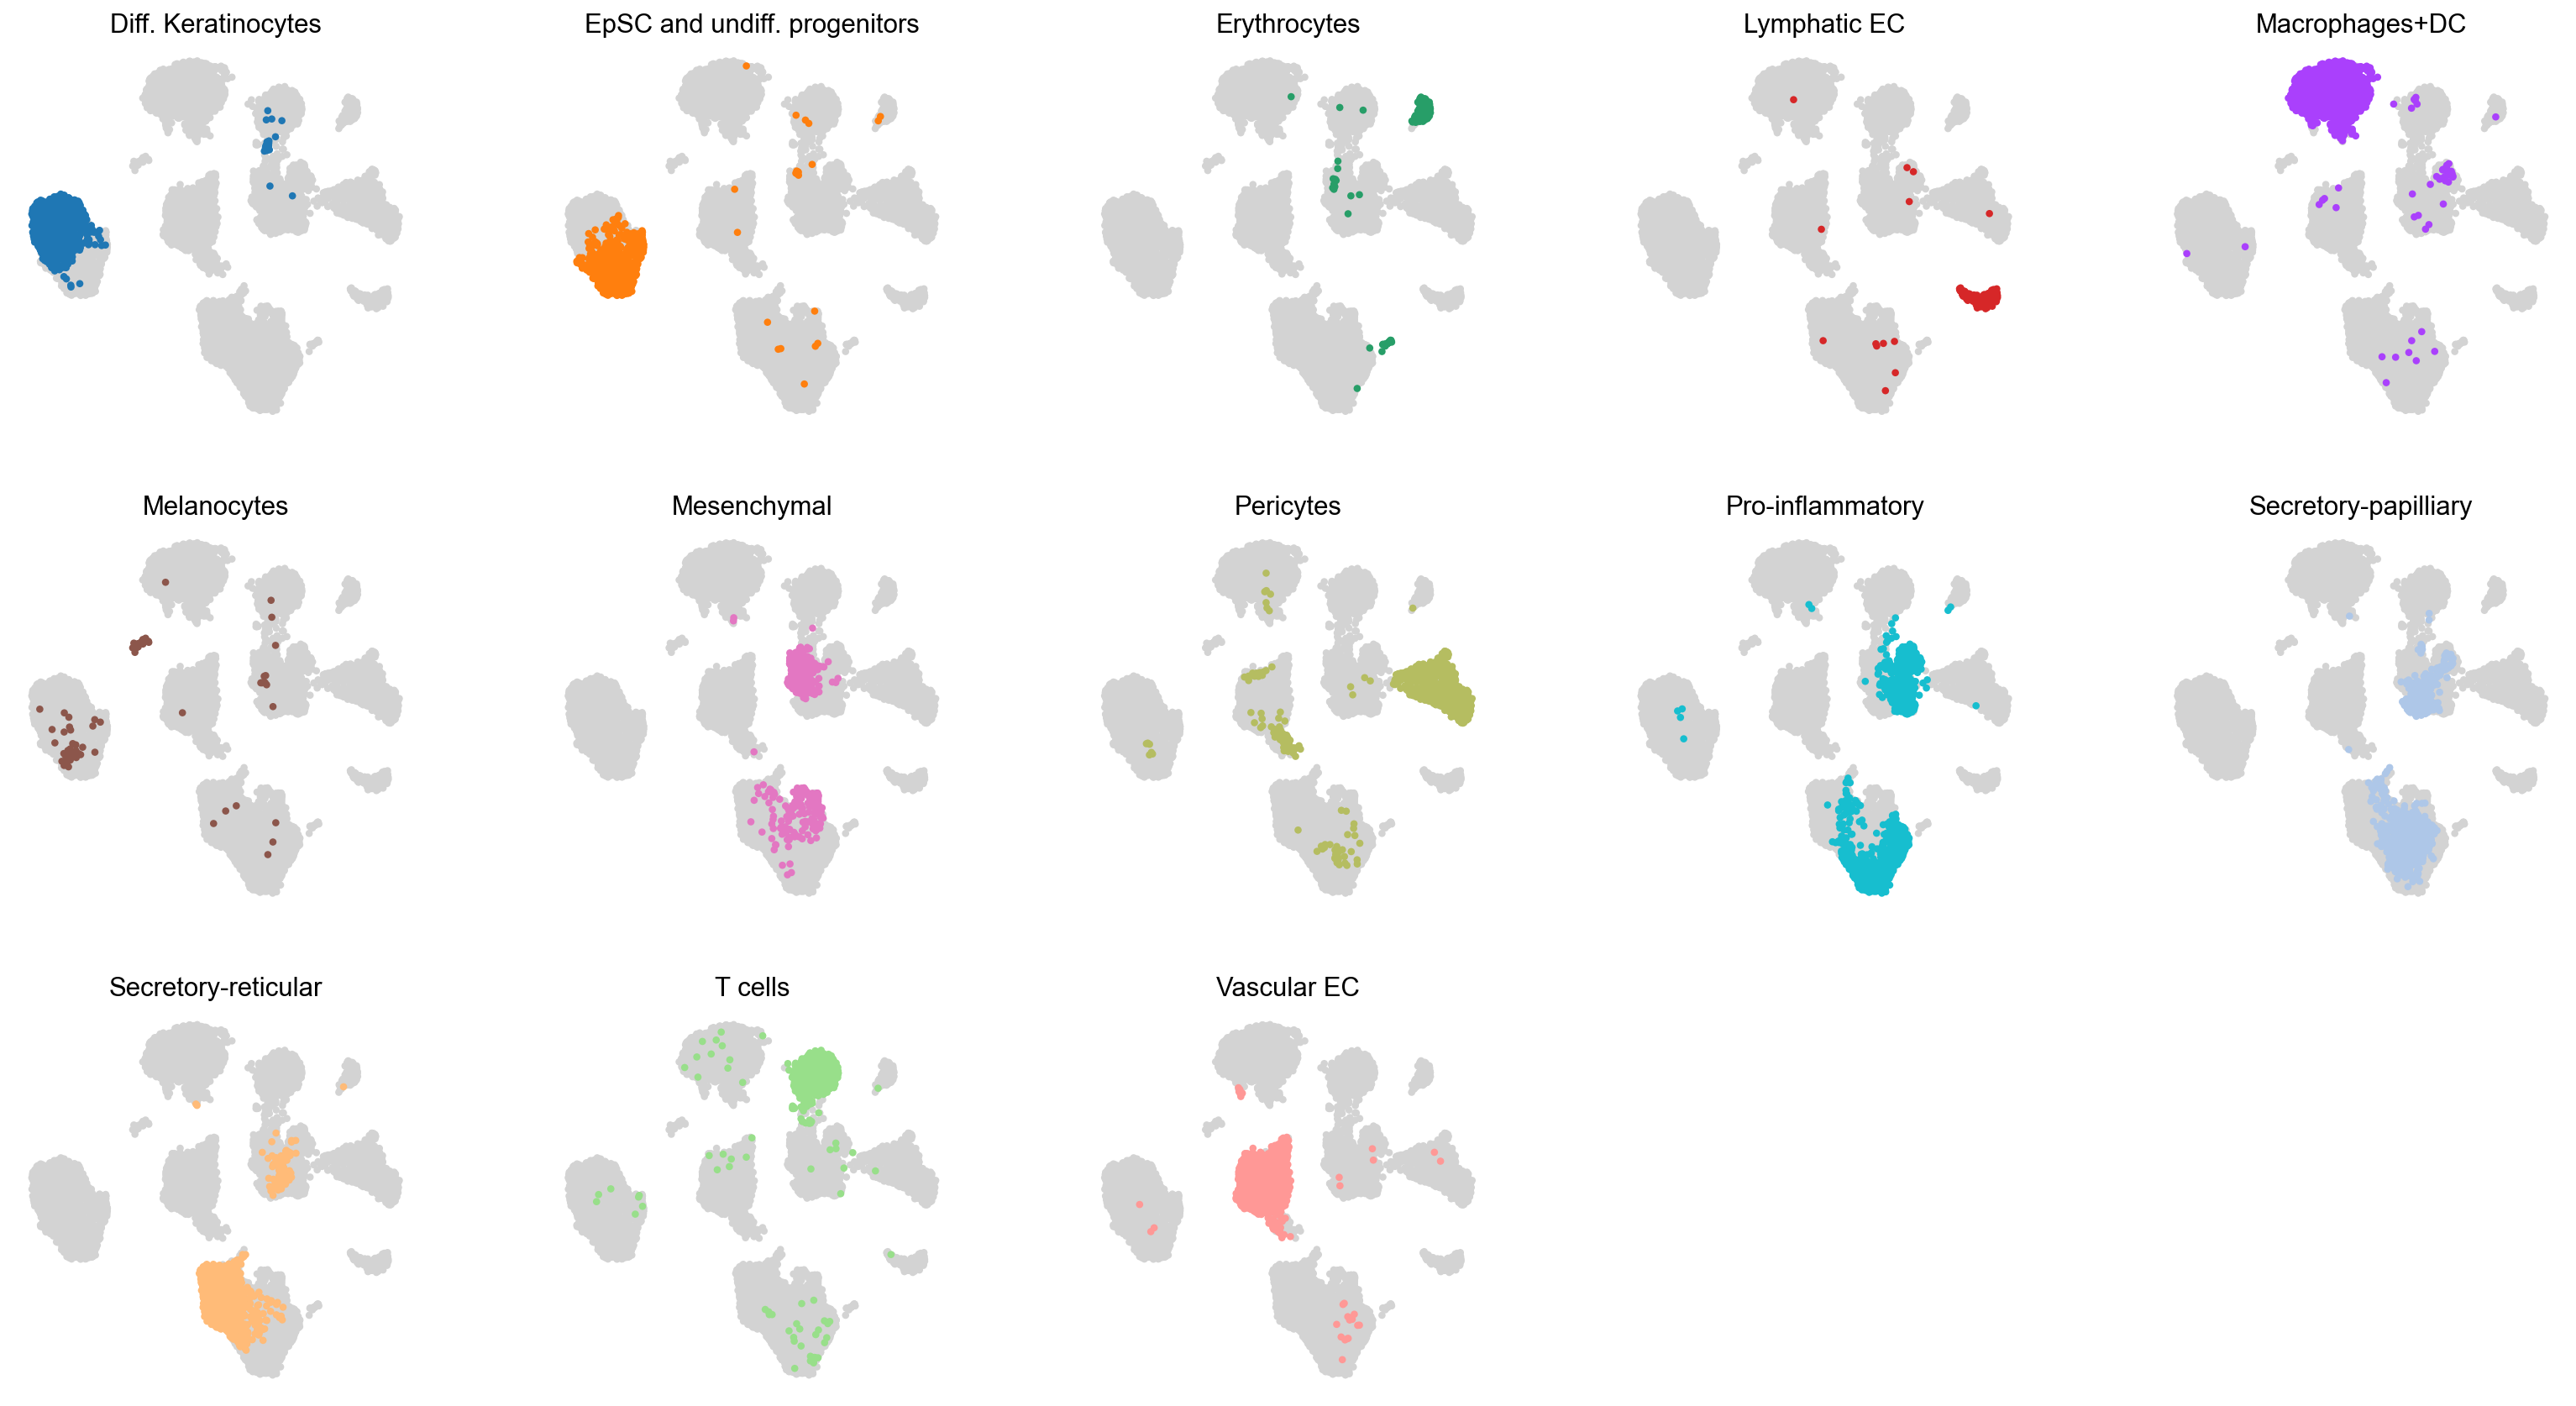

In [432]:
cluster_small_multiples(ad3,'Celltype',ncols=5)

In [433]:
ad=ad3.copy()

In [434]:
ad.obs['cell']=list(ad.obs['Celltype'])

In [441]:
adx0 = ad[ad.obs['batch']=='0',:].copy()
adx1 = ad[ad.obs['batch']=='1',:].copy()

In [442]:
adx0

AnnData object with n_obs × n_vars = 10003 × 21352
    obs: 'nCount_RNA', 'nFeature_RNA', 'subj', 'percent.mito', 'age', 'ClusterNum', 'ClusterNum_Age', 'ClusterNum_Celltype_and_Age', 'Celltype', 'Celltype_and_Age', 'sample', 'batch', 'cell'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'pca', 'neighbors', 'umap', 'age_colors', 'sample_colors', 'Celltype_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_raw', 'X_pca_harmony', 'X_umap_1'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

Mean CV accuracy: 0.9217
Accuracy on the training set: 0.9804
Accuracy on the hold-out set: 0.9202


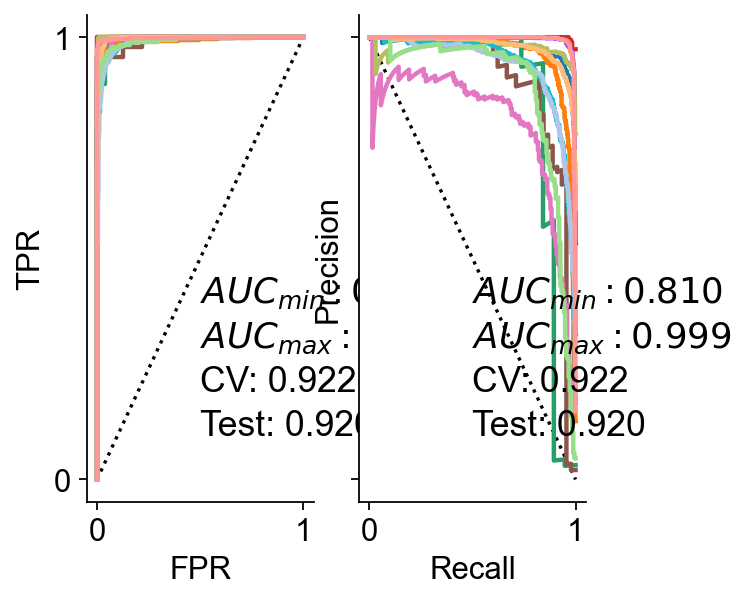

In [565]:
figsize(4,4)
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adx0.obsm['X_pca_harmony'], adx0.obs['cell'])
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

In [566]:
ad.obs['predict'] = clf.predict(ad.obsm['X_pca_harmony'])

In [14]:
ad.obs['predict']=ad.obs['predict'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


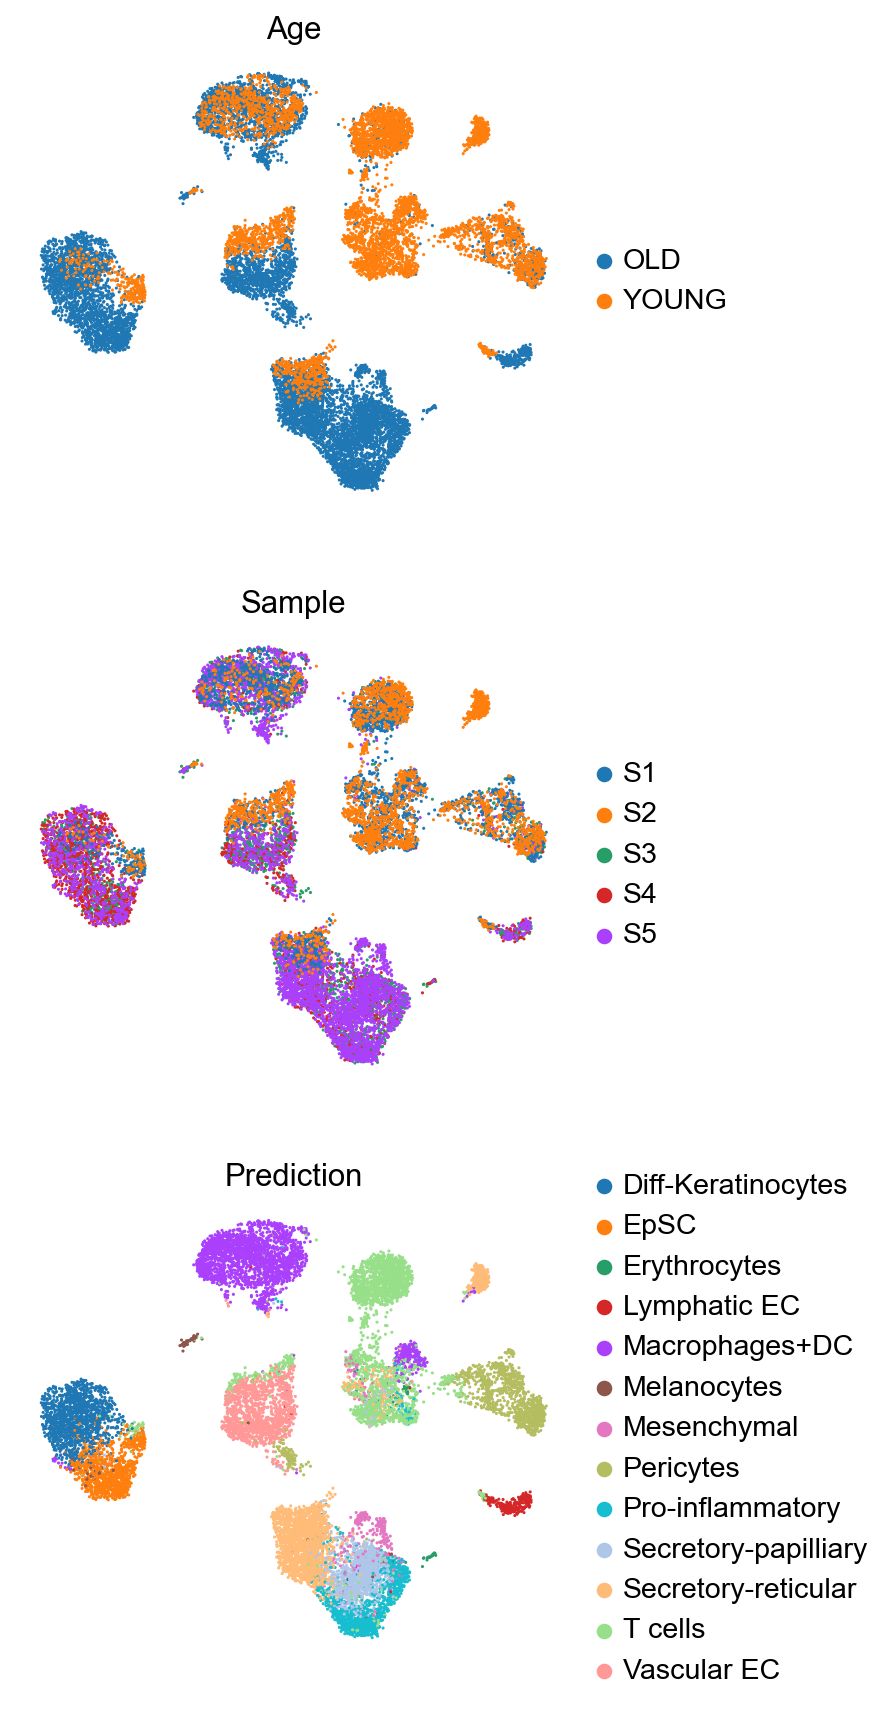

In [15]:
figsize(4,4)
sc.pl.umap(ad, color=['age','sample','predict'],title=['Age','Sample','Prediction'],ncols=1)

In [16]:
ad.obs['Celltype']=ad.obs['Celltype'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


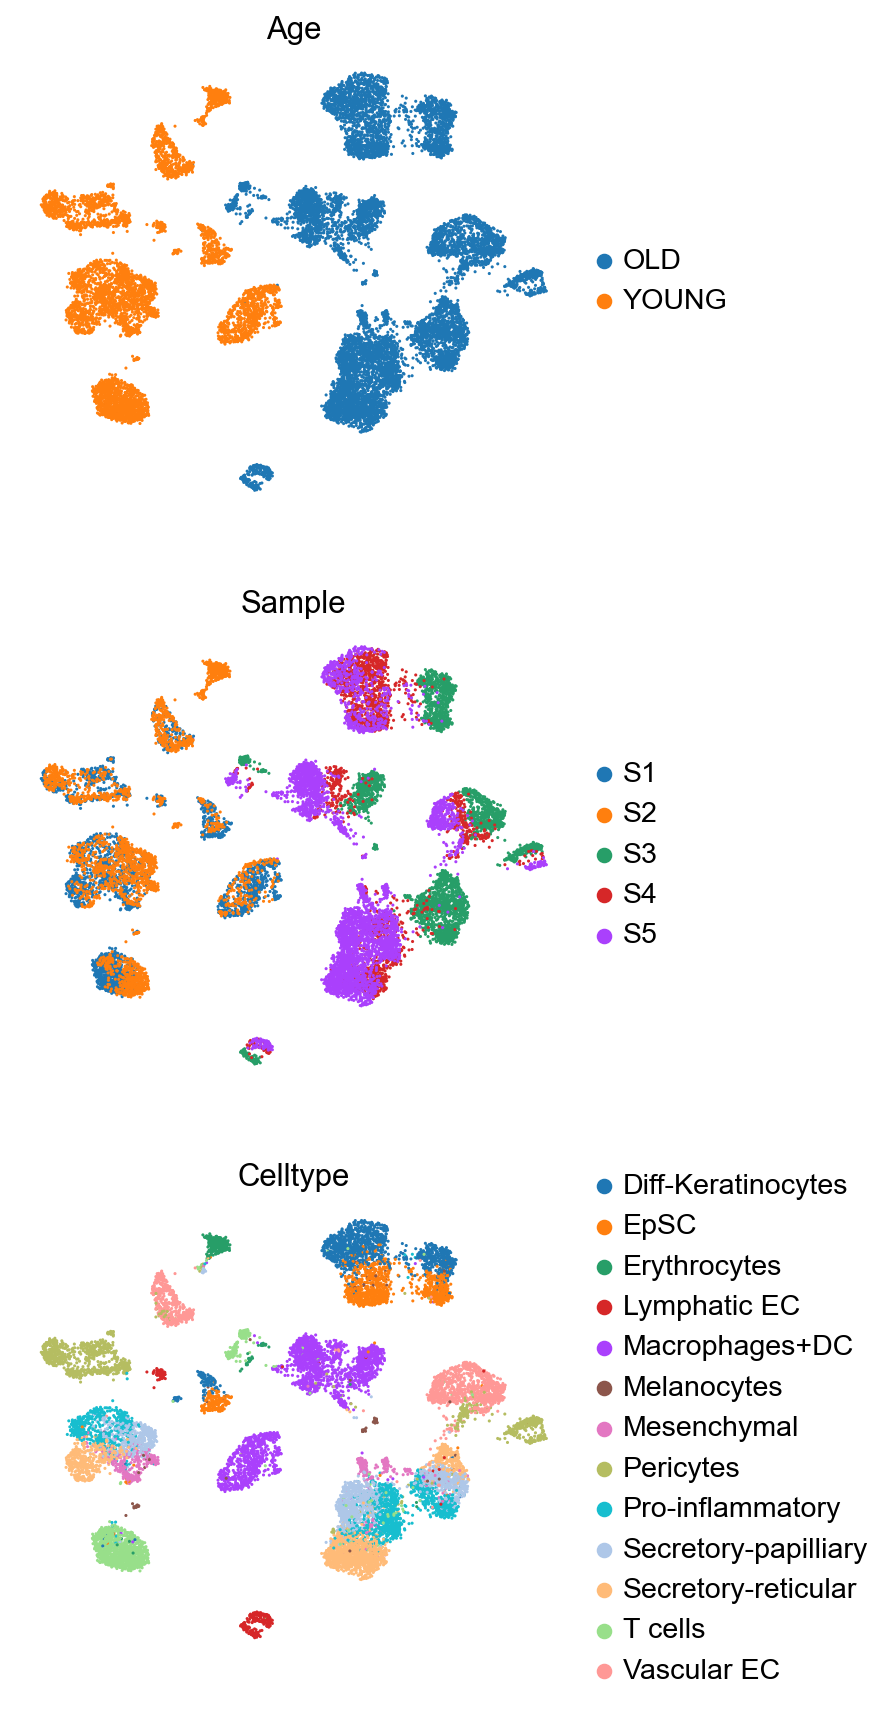

In [17]:
figsize(4,4)
sc.pl.embedding(ad, color=['age','sample','Celltype'],title=['Age','Sample','Celltype'],ncols=1,basis='X_umap_raw')

In [29]:
ad.obs['cell']=ad.obs['cell'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})

In [30]:
ad.write_h5ad('results/SKIN_before_scDenorm.h5ad')

In [31]:
adx0 = ad[ad.obs['batch']=='0',:].copy()
adx1 = ad[ad.obs['batch']=='1',:].copy()

In [32]:
df = ad[ad.obs.batch=='0'].obs.groupby(["cell", "predict"]).size().unstack(fill_value=0)

In [33]:
df

predict               Diff-Keratinocytes  EpSC  Erythrocytes  Lymphatic EC  \
cell                                                                         
Diff-Keratinocytes                  1207    50             0             0   
EpSC                                  75   890             0             0   
Erythrocytes                           1     0            35             0   
Lymphatic EC                           0     0             0           227   
Macrophages+DC                         2     1             2             1   
Melanocytes                            1     5             0             0   
Mesenchymal                            0     0             0             1   
Pericytes                              0     0             0             0   
Pro-inflammatory                       4     0             2             1   
Secretory-papilliary                   1     0             0             0   
Secretory-reticular                    0     0             1             0   
T cells                                2     2             0             1   
Vascular EC                            1     0             0             2   

predict               Macrophages+DC  Melanocytes  Mesenchymal  Pericytes  \
cell                                                                        
Diff-Keratinocytes                 0            3            0          2   
EpSC                              15            8            2          3   
Erythrocytes                       0            0            0          0   
Lymphatic EC                       0            0            0          1   
Macrophages+DC                  1498            1            1          3   
Melanocytes                        0           81            1          0   
Mesenchymal                        1            0          215          1   
Pericytes                          1            0            1        401   
Pro-inflammatory                   2            1           33          2   
Secretory-papilliary               2            2           28          0   
Secretory-reticular                0            0            2          3   
T cells                           11            0            3          0   
Vascular EC                        6            0            1          9   

predict               Pro-inflammatory  Secretory-papilliary  \
cell                                                           
Diff-Keratinocytes                   0                     2   
EpSC                                 1                     4   
Erythrocytes                         1                     0   
Lymphatic EC                         0                     0   
Macrophages+DC                       8                     5   
Melanocytes                          0                     0   
Mesenchymal                          9                     6   
Pericytes                            1                     2   
Pro-inflammatory                  1065                    45   
Secretory-papilliary                91                  1048   
Secretory-reticular                 37                    50   
T cells                              6                     3   
Vascular EC                          2                     8   

predict               Secretory-reticular  T cells  Vascular EC  
cell                                                             
Diff-Keratinocytes                      3        2            0  
EpSC                                    1        3            3  
Erythrocytes                            1        0            0  
Lymphatic EC                            1        0            0  
Macrophages+DC                          6       19            1  
Melanocytes                             1        0            0  
Mesenchymal                            13        1            0  
Pericytes                               2        1            3  
Pro-inflammatory                       34       11  

In [34]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

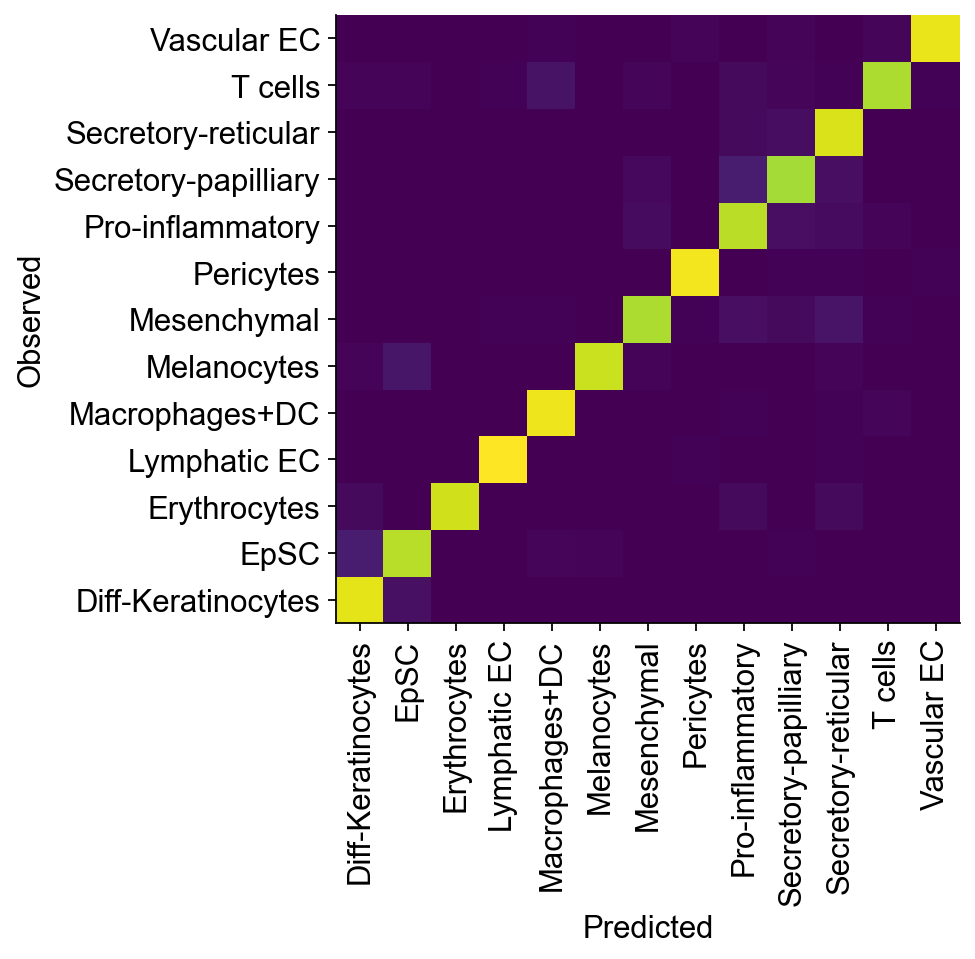

In [35]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

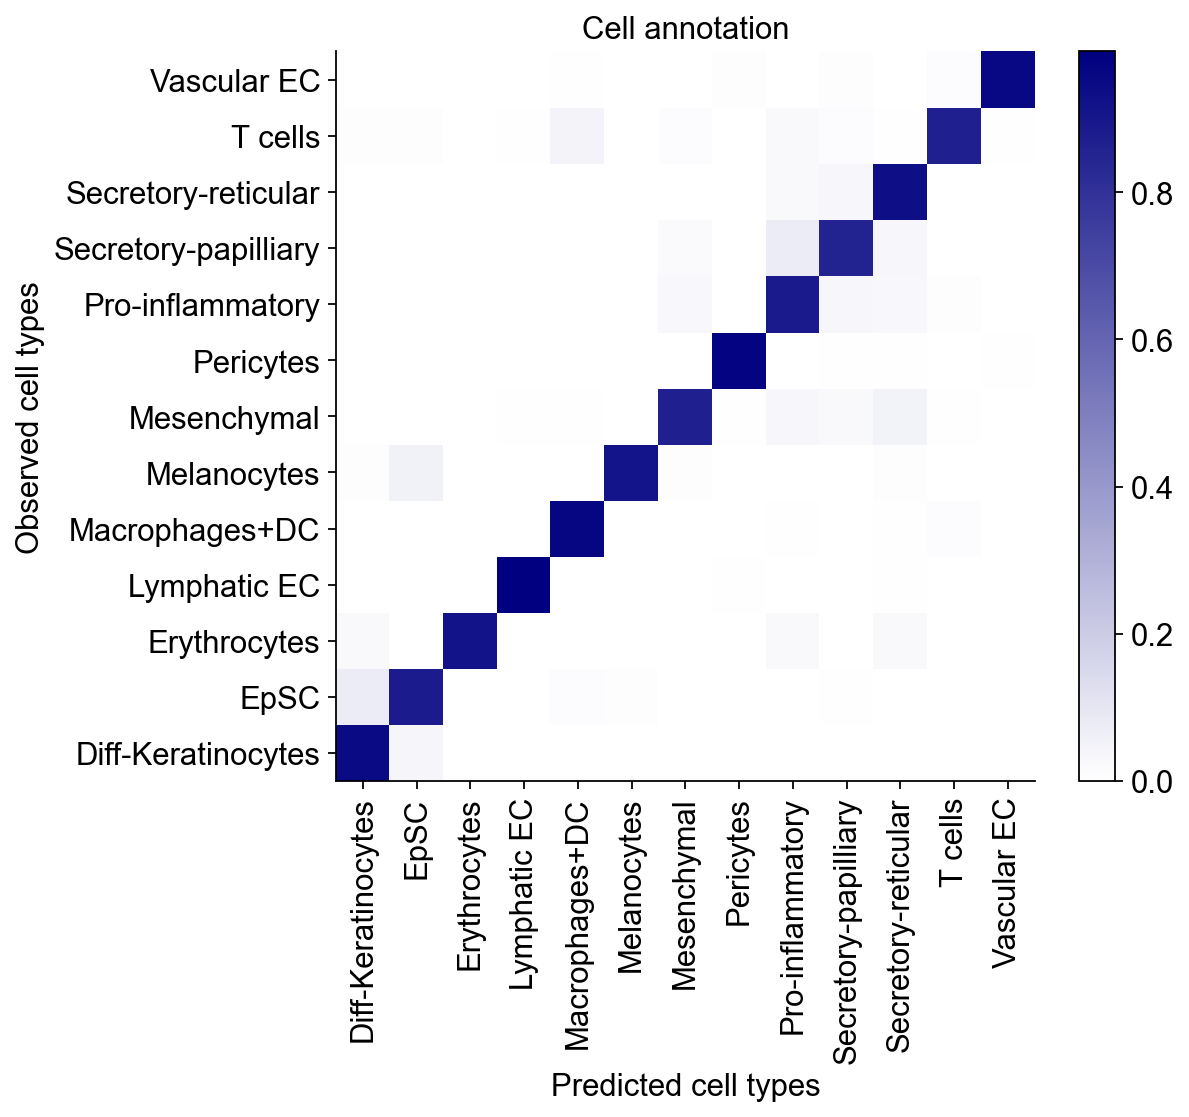

In [36]:
colors = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a']
cmap = mcolors.ListedColormap(colors)
color_stops = [(0.0, (1.0, 1.0, 1.0)),  # white
               (1.0, (0.0, 0.0, 0.5))]  # deep blue

# create the custom colormap using LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom', color_stops)

fig, ax = plt.subplots(figsize=(7, 6))
#plt.figure(figsize=(8, 8))
pcolor = plt.pcolor(conf_mat,cmap=cmap)
_ = plt.xticks(np.arange(0.5, len(conf_mat.columns), 1), conf_mat.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(conf_mat.index), 1), conf_mat.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
# remove the x-tick labels
#_ = ax.set_xticklabels([])
title=ax.set_title("Cell annotation")
title.set_fontsize(14)
ax.set_xlabel("Predicted cell types")
ax.set_ylabel("Observed cell types")
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("bottom", size="5%", pad=0.3)

fig.colorbar(pcolor)#, cax=cax, orientation='horizontal')
#plt.xlabel(" ")
#plt.ylabel(" ")
#plt.savefig('figures/adult_scAnnot_model_accuracy_v1.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [37]:
df = ad[ad.obs.batch=='1'].obs.groupby(["cell", "predict"]).size().unstack(fill_value=0)

In [38]:
df

predict               Diff-Keratinocytes  EpSC  Erythrocytes  Lymphatic EC  \
cell                                                                         
Diff-Keratinocytes                    90     0             0             0   
EpSC                                  16   121             1             0   
Erythrocytes                           0     0             0             0   
Lymphatic EC                           0     0             0            43   
Macrophages+DC                         0     0             0             0   
Melanocytes                            1     2             2             0   
Mesenchymal                            0     0             9             0   
Pericytes                              0     0             0             0   
Pro-inflammatory                       0     0            26             0   
Secretory-papilliary                   0     0             1             0   
Secretory-reticular                    0     0             2             0   
T cells                                0     0             0             0   
Vascular EC                            0     0             0             0   

predict               Macrophages+DC  Melanocytes  Mesenchymal  Pericytes  \
cell                                                                        
Diff-Keratinocytes                 0            0            0          0   
EpSC                               1            0            0          0   
Erythrocytes                       5            0            0          0   
Lymphatic EC                       0            0            0          0   
Macrophages+DC                   674            0            0          0   
Melanocytes                        1           15            0          0   
Mesenchymal                        1            0           53          0   
Pericytes                          2            0            0        726   
Pro-inflammatory                 168            0            0          3   
Secretory-papilliary              14            0            4          0   
Secretory-reticular                3            0            0          1   
T cells                            1            0            0          0   
Vascular EC                        1            0            0          2   

predict               Pro-inflammatory  Secretory-papilliary  \
cell                                                           
Diff-Keratinocytes                   0                     0   
EpSC                                 0                     0   
Erythrocytes                         0                     0   
Lymphatic EC                         0                     0   
Macrophages+DC                       0                     0   
Melanocytes                          0                     0   
Mesenchymal                          0                     0   
Pericytes                            0                     0   
Pro-inflammatory                    46                     0   
Secretory-papilliary                 0                    48   
Secretory-reticular                  1                     0   
T cells                              0                     0   
Vascular EC                          0                     0   

predict               Secretory-reticular  T cells  Vascular EC  
cell                                                             
Diff-Keratinocytes                      0       40            0  
EpSC                                    1       42            0  
Erythrocytes                          260        7            0  
Lymphatic EC                            0       22            0  
Macrophages+DC                          0        6            0  
Melanocytes                             1       12            0  
Mesenchymal                            64      220            0  
Pericytes                               1       74            5  
Pro-inflammatory                       43      306  

In [39]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

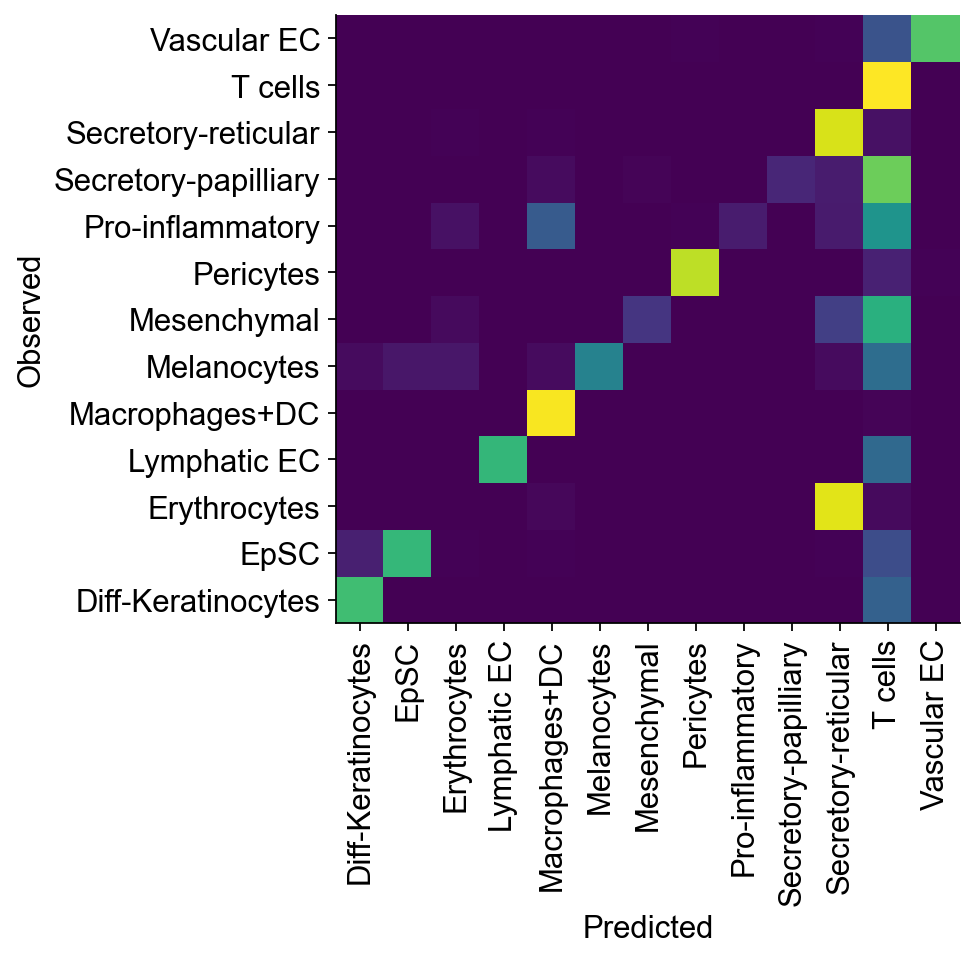

In [40]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

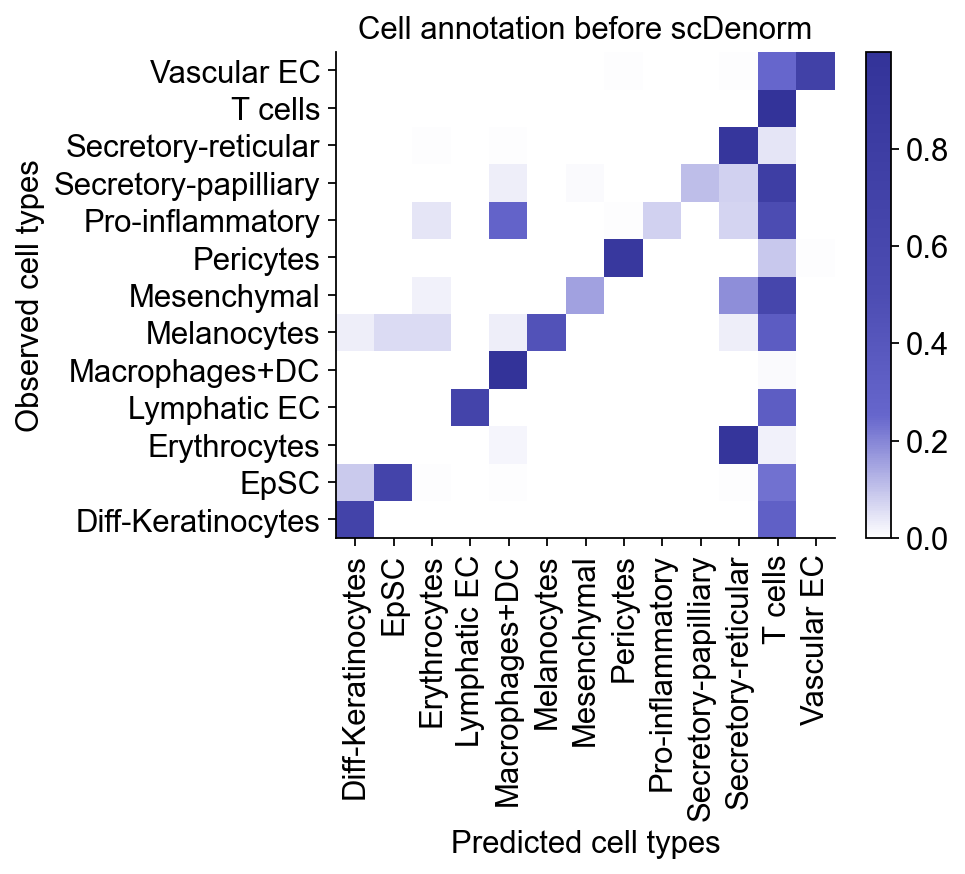

In [41]:
colors = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a']
cmap = mcolors.ListedColormap(colors)
color_stops = [(0.0, (1.0, 1.0, 1.0)),  # white
               (1.0, (0.0, 0.0, 0.5))]  # deep blue

color_stops = [(0.0, (1.0, 1.0, 1.0)), # white
               #(0.25, (0.8, 0.8, 1.0)), # light blue
               (0.25, (0.4, 0.4, 0.8)), # medium blue
               (0.5, (0.3, 0.3, 0.7)),
               (1.0, (0.2, 0.2, 0.6)), # dark blue
               #(1.0, (0.0, 0.0, 0.5))
              ] # deep blue

# create the custom colormap using LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom', color_stops)

fig, ax = plt.subplots(figsize=(5, 4))
#plt.figure(figsize=(8, 8))
pcolor = plt.pcolor(conf_mat,cmap=cmap)
_ = plt.xticks(np.arange(0.5, len(conf_mat.columns), 1), conf_mat.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(conf_mat.index), 1), conf_mat.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
# remove the x-tick labels
#_ = ax.set_xticklabels([])
title=ax.set_title("Cell annotation before scDenorm")
title.set_fontsize(14)
ax.set_xlabel("Predicted cell types")
ax.set_ylabel("Observed cell types")
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("bottom", size="5%", pad=0.3)

fig.colorbar(pcolor)#, cax=cax, orientation='horizontal')
#plt.xlabel(" ")
#plt.ylabel(" ")
plt.savefig('figures/SKIN_CM_before_scDenorm.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

# Sankey plot

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.path import Path


class SankeyNode:
    '''
    This class defines and draws a single node in the sankey diagram. It shouldn't need to be created
    by the end user, but one may want to edit some properties after creation.

    For example, if you wanted to edit the label format of a single node to have more decimals:
        s = Sankey(flows)
        node = s.find_node(node_name)[0]
        node.label_format = '{label} {value:,.2f}'
    '''

    def __init__(self, x, y, width, height, name, value, 
                    label='', label_format='{label}\n{value:,.0f}', label_pos='left', label_pad_x=0.01, label_opts=dict(fontsize=14), 
                    align_y='top', color='#FF33AA',
                    artist_type='rectangle', **kwargs):
        '''
        @param x : left edge, typically the flow level, as a 0-indexed integer. 1 = distance between nodes 
        @param y : bottom edge, between [0, 1]
        @param width : 1 = distance between nodes
        @param height : total extent of axis is 1
        @param name : aunique name to refer to this node
        @param value : the value of this node
        @param align_y : how to align the flows that enter/exit the node. Options: {'top', 'top overlap'}
        @param color : any matplotlib color specifier
        @param label : alternative name to display. If not label, uses `name`
        @param label_format : format string that can optionally have 'label' and 'value' fields. Set to '' to remove labels
        @param label_pos : position of the label {'left', 'right', 'top', 'bottom', 'center'}
        @param label_pad_x : padding in x from the node, as fraction of distance between nodes
        @param label_opts : dictionary with additional options for the label. See matplotlib.axis.text() for options
        '''
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.name = name
        self.value = value
        self.label = label or name
        self.label_format = label_format
        self.label_pos = label_pos
        self.label_pad_x = label_pad_x
        self.label_opts = label_opts
        self.artist_type = artist_type
        self.align_y = align_y
        self.color = color
        self.flow_pad = 0 # vertical padding between flow endpoints
        self.inflows = []
        self.outflows = []
        self.artist = None
        self.text = None


    def get_flow_y(self, i, side):
        '''
        Returns the (y_low, y_hi) position of flow i on the given side {'inflows', 'outflows'}
        '''
        flows = getattr(self, side)
        value_scale = self.value / (self.height - self.flow_pad * (len(flows) - 1))
        if self.align_y == 'top overlap':
            if len(flows) > 1 and (total := sum(x.value for x in flows)) > self.value:
                overlap = (total - self.value) / (len(flows) - 1) / value_scale
                y1 = self.y + self.height - (np.sum([x.value for x in flows[:i]]) / value_scale + (self.flow_pad - overlap) * i)
                y0 = y1 - flows[i].value / value_scale
                return (y0, y1)
            # else use 'top' below
        
        if 'top' in self.align_y:
            y1 = self.y + self.height - (np.sum([x.value for x in flows[:i]]) / value_scale + self.flow_pad * i)
            y0 = y1 - flows[i].value / value_scale
            return (y0, y1)
        else:
            raise NotImplementedError("align_y: " + self.align_y)

    def draw(self, ax):
        # Node
        if self.artist_type == 'rectangle':
            self.artist = mpatches.Rectangle((self.x, self.y), self.width, self.height)
        else:
            raise NotImplementedError("artist: {}".format(self.artist_type))
        self.artist.set_color(self.color)
        self.artist.set_edgecolor(None)
        ax.add_patch(self.artist)

        # Label
        if self.label_format:
            if self.label_pos == 'left':
                x = self.x - self.label_pad_x
                y = self.y + self.height / 2
                ha = 'right'
                va = 'center'
            elif self.label_pos == 'right':
                x = self.x + self.width + self.label_pad_x
                y = self.y + self.height / 2
                ha = 'left'
                va = 'center'
            elif self.label_pos == 'top':
                x = self.x + self.width / 2
                y = self.y + self.height
                ha = 'center'
                va = 'bottom'
            elif self.label_pos == 'bottom':
                x = self.x + self.width / 2
                y = self.y
                ha = 'center'
                va = 'top'
            elif self.label_pos == 'center':
                x = self.x + self.width / 2
                y = self.y + self.height / 2
                ha = 'center'
                va = 'center'
            else:
                raise ValueError("label_pos: " + self.label_pos)
            self.text = ax.text(x, y, self.label_format.format(label=self.label, value=self.value), ha=ha, va=va, **self.label_opts)



class SankeyFlow:
    '''
    This class defines and draws a single flow in the sankey diagram. It shouldn't need to be created
    by the end user, but one may want to edit some properties after creation.
    '''

    path_codes = [
        Path.MOVETO, # Top left
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4, # Top right
        Path.LINETO, # Bottom right
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4, # Bottom left
        Path.CLOSEPOLY
    ]

    def __init__(self, src, des, value, curvature = 0.3, color='#AAAAAA66', **kwargs):
        '''
        @param src : the source node
        @param des : the destination node
        @param value : value of the flow
        @param curvature : how curvy the flows are, with 0 = no curve and 1 = maximal curve
        @param color : Any matplotlib color specifier
        '''
        self.value = value
        self.curvature = curvature
        self.color = color
        self.node_pad = 0 # x padding from the node (sometimes they overlap), as fraction of distance between nodes in x
        self.artist = None

        self.src = src
        self.des = des
        self.src_i = len(src.outflows)
        self.des_i = len(des.inflows)
        src.outflows.append(self)
        des.inflows.append(self)


    def draw(self, ax):

        if self.src.artist_type != 'rectangle':
            raise NotImplementedError("artist: {}".format(self.src.artist_type))
        if self.des.artist_type != 'rectangle':
            raise NotImplementedError("artist: {}".format(self.des.artist_type))

        x1 = self.src.x + self.src.width + self.node_pad
        x2 = self.des.x - self.node_pad
        (y1_1, y1_2) = self.src.get_flow_y(self.src_i, 'outflows')
        (y2_1, y2_2) = self.des.get_flow_y(self.des_i, 'inflows')

        if self.curvature == 0:
            self.artist = mpatches.Polygon([
                [x1, y1_2], # top left
                [x2, y2_2], # top right
                [x2, y2_1], # bottom right
                [x1, y1_1], # bottom left
            ])
            self.artist.set_color(self.color)
            self.artist.set_edgecolor(None)
        else:
            poly_x1 = x1 + self.curvature * (x2 - x1)
            poly_x2 = x2 - self.curvature * (x2 - x1)
            path = Path([
                    [x1, y1_2], # top left
                    [poly_x1, y1_2], # top control 1
                    [poly_x2, y2_2], # top control 2
                    [x2, y2_2], # top right
                    [x2, y2_1], # bottom right
                    [poly_x2, y2_1], # bottom control 1
                    [poly_x1, y1_1], # bottom control 2
                    [x1, y1_1], # bottom left
                    [0, 0], # end
                ], SankeyFlow.path_codes)
            self.artist = mpatches.PathPatch(path, facecolor=self.color, linewidth=0)
            self.artist.set_edgecolor(None)
        
        ax.add_patch(self.artist)


class Sankey:
    '''
    This class creates and manages a sankey diagram. The typical workflow is:
        s = Sankey()
        s.sankey(flows, nodes)
        s.draw()
        plt.show()
    '''

    def __init__(self, flows=None, nodes=None, align_y='top', 
                    cmap=plt.cm.tab10, flow_color_mode='dest', flow_color_mode_alpha=0.6, 
                    node_width=0.03, node_height_pad_min=0, node_pad_y_min=0.01, node_pad_y_max=0.05,
                    node_opts={}, flow_opts={}, **kwargs):
        '''
        @param flows : see Sankey.sankey(). Can optionally input flows here as a shortcut
        @param nodes : see Sankey.sankey(). Can optionally input nodes here as a shortcut
        @param align_y : vertical alignment of the nodes {'top', 'center', 'bottom', 'justify', 'tree', 'tree clamp'}. If array-like, padding in each level
        @param cmap : colormap for default colors
        @param flow_color_mode : {'source', 'dest', 'lesser', 'greater', None}
                    'source', 'dest' : the flows will be colored the same as the source/destination node
                    'lesser', 'greater' : the flows will be colored as the node with the lesser/greater value 
        @param flow_color_mode_alpha : transparency of the flows
        @param node_width : width of the nodes, as fraction of distance between nodes
        @param node_height_pad_min : if node.height < node_height_pad_min, adds additional y padding. Value is a fraction of axis height. If array-like, padding in each level
        @param node_pad_y_min : minimum vertical padding between nodes, as fraction of distance between nodes. If array-like, padding in each level
        @param node_pad_y_max : maximum vertical padding between nodes, as fraction of distance between nodes. If array-like, padding in each level
        @param node_opts : a dictionary of options to SankeyNode() that is applied to all nodes
        @param flow_opts : a dictionary of options to SankeyFlow() that is applied to all flows
        '''
        self.align_y = align_y
        self.cmap = cmap
        self.flow_color_mode = flow_color_mode
        self.flow_color_mode_alpha = flow_color_mode_alpha
        self.node_width = node_width
        self.node_height_pad_min = node_height_pad_min
        self.node_pad_y_min = node_pad_y_min
        self.node_pad_y_max = node_pad_y_max
        self.node_opts = node_opts
        self.flow_opts = flow_opts

        self.nodes = [] # Nested list of SankeyNode, indexed by (node_level, i_node)
        self.flows = [] # List of SankeyFlows

        if flows or nodes:
            self.sankey(flows, nodes)

    def find_node(self, name):
        '''
        Finds the node with the given name and returns it and its level in the current diagram (node, level)
        '''
        for level,node_level in enumerate(self.nodes):
            for node in node_level:
                if node.name == name:
                    return (node, level)
        return (None, None)

    @staticmethod
    def infer_nodes(flows):
        '''
        Given a list of flows, automatically infers the nodes and returns them in a nested list which
        can be directly input into sankey(). The flows must not have loops or backwards flows.

        @param flows : See Sankey.sankey()
        '''
        from collections import defaultdict
        nodes = defaultdict(lambda: [0, 0, 0, set(), set()]) # min_level, in_value, out_value, parents, children
        max_level = 0

        for flow in flows:
            src = nodes[flow[0]]
            des = nodes[flow[1]]
            if des[0] <= src[0]:
                des[0] = src[0] + 1
                max_level = max(max_level, des[0])
            src[2] += flow[2]
            des[1] += flow[2]
            src[4].add(flow[1])
            des[3].add(flow[0])

        arr = [[] for _ in range(max_level+1)]
        for k,v in nodes.items():
            # maximize the level
            level = v[0]
            for child in v[4]:
                level = max(level, nodes[child][0] - 1)
            arr[level].append([k, max(v[1], v[2])])

        return arr

    def _get_opt(self, opt, level):
        '''
        Some options can be array-like, in which case index by node level
        '''
        val = getattr(self, opt)
        if isinstance(val, tuple) or isinstance(val, list):
            return val[level]
        else:
            return val

    def _value_scale_level(self, level, nodes_level):
        '''
        Finds the value scale such that this level ranges exactly from y=[0,1] including padding
        '''
        min_pad = self._get_opt('node_pad_y_min', level) * (len(nodes_level) - 1)
        heights = np.array([node[1] for node in nodes_level])
        scale = np.sum(heights) / (1 - min_pad)
        node_height_pad_min = self._get_opt('node_height_pad_min', level)
        if node_height_pad_min == 0:
            return scale
        else:
            if node_height_pad_min * len(nodes_level) + min_pad > 1:
                raise ValueError('sankey: node_height_pad_min {} is too large for level with size {}'.format(node_height_pad_min, len(nodes_level)))
            
            nsmall = 0
            while (smalls := heights / scale <= node_height_pad_min).any(): # any smalls left over = we need to increase the scale
                nsmall += np.count_nonzero(smalls)
                heights = heights[~smalls]
                scale = np.sum(heights) / (1 - min_pad - nsmall * node_height_pad_min)

            return scale

    def _level_node_max_padding(self, level, nodes_level, value_scale):
        '''
        @returns the max padding that can be used in this level
        '''
        if len(nodes_level) < 2:
            return 0
        heights = np.array([node[1] for node in nodes_level]) / value_scale
        level_value = np.sum(np.maximum(heights, self._get_opt('node_height_pad_min', level)))
        return (1 - level_value) / (len(nodes_level) - 1)

    def _get_node_ys(self, level, nodes_level, value_scale):
        '''
        Returns the y-positions of the nodes in a single level as (y_low, height)
        '''
        # Options
        align_y = self._get_opt('align_y', level)
        node_pad_y_min = self._get_opt('node_pad_y_min', level)
        node_pad_y_max = self._get_opt('node_pad_y_max', level)
        node_height_pad_min = self._get_opt('node_height_pad_min', level)

        # Get padding
        max_padding = self._level_node_max_padding(level, nodes_level, value_scale)
        if align_y == 'justify':
            node_pad_y = max_padding
        else:
            node_pad_y = min(max_padding, max(node_pad_y_max, node_pad_y_min))

        # Special case for n=1 with align = center or justify. align = top or bottom can use the general code below
        if len(nodes_level) == 1 and align_y in ['center', 'justify']:
            height = nodes_level[0][1] / value_scale
            pad = (1 - height) / 2
            return [(pad, height)]

        # General case
        ys = []
        if align_y == 'bottom':
            y = 0
            for node in reversed(nodes_level):
                height = node[1] / value_scale
                if height < node_height_pad_min:
                    pos = y + (node_height_pad_min - height) / 2
                    ys.insert(0, (pos, height))
                    y += node_height_pad_min + node_pad_y
                else:
                    ys.insert(0, (y, height))
                    y += actual_height + node_pad_y
        else:
            y = 1
            if align_y == 'center':
                y -= (max_padding - node_pad_y) * (len(nodes_level) - 1) / 2
            for node in nodes_level:
                height = node[1] / value_scale
                y -= height
                if height < node_height_pad_min:
                    y -= (node_height_pad_min - height) / 2
                    ys.append((y, height))
                    y -= (node_height_pad_min - height) / 2
                else:
                    ys.append((y, height))
                y -= node_pad_y
        return ys

    def sankey(self, flows, nodes=None):
        '''
        @param flows : A list of flows as (source_name, dest_name, value) or (source_name, dest_name, value, opts),
                       where opts is a dictionary containing arguments to SankeyFlow(). opts may also contain key flow_color_mode with 
                       the same meaning as in Sankey(), but applied only to this flow. 
        @param nodes : A list of node levels, from sources to destinations. In each level, a list of nodes as (name, value) or (name, value, opts),
                       where opts is a dictionary containing arguments to SankeyNode().
        '''

        if not nodes:
            nodes = self.infer_nodes(flows)
            

        # Get scaling. The widest level should extend exactly from y = 0 to 1 including padding
        widest_level = 0
        value_scale = 0
        for level,nodes_level in enumerate(nodes):
            scale = self._value_scale_level(level, nodes_level)
            if scale > value_scale:
                value_scale = scale
                widest_level = level

        # Nodes
        self.nodes = []
        i_color = 0 # for automatic coloring
        for level,nodes_level in enumerate(nodes):
            arr = [] # nodes in this level
            ys = self._get_node_ys(level, nodes_level, value_scale)
            for node,(y,height) in zip(nodes_level, ys):
                # Error check
                if node[1] < 0:
                    print('Warning: Node has value < 0: {}'.format(node))

                # Node configuration
                args = dict(color=self.cmap(i_color % self.cmap.N))
                args.update(self.node_opts) # global options
                if len(node) > 2:
                    args.update(node[2]) # individual options

                # Create node
                arr.append(SankeyNode(level, y, self.node_width, height, node[0], node[1], **args))
                i_color += 1
            self.nodes.append(arr)

        # Flows
        self.flows = []
        for flow in flows:
            (src, src_level) = self.find_node(flow[0])
            (des, des_level) = self.find_node(flow[1])

            # Error check
            if not src:
                raise KeyError("Bad flow - couldn't find souce node: {}".format(flow))
            if not des:
                raise KeyError("Bad flow - couldn't find destination node: {}".format(flow))
            if flow[2] > src.value or flow[2] > des.value or flow[2] < 0:
                print("Warning: Bad flow - bad weight: {}".format(flow))
            if des_level <= src_level:
                raise ValueError("Bad flow - flow is backwards: {}".format(flow))

            # Auto color
            custom_opts = flow[3] if len(flow) > 3 else {}
            flow_color_mode = custom_opts.get('flow_color_mode', self.flow_color_mode)
            if 'dest' in flow_color_mode:
                color = des.color
            elif 'source' in flow_color_mode:
                color = src.color
            elif 'lesser' in flow_color_mode:
                color = src.color if src.value < des.value else des.color
            elif 'greater' in flow_color_mode:
                color = src.color if src.value > des.value else des.color
            else:
                color = '#AAAAAA'
            color = mcolors.to_rgba(color)
            color = (*color[:3], color[3] * self.flow_color_mode_alpha)
            
            # Create flow
            args = dict(color=color)
            args.update(self.flow_opts)
            args.update(custom_opts)
            self.flows.append(SankeyFlow(src, des, flow[2], **args))

        # Post-creation layout
        if isinstance(self.align_y, list) or isinstance(self.align_y, tuple) or 'tree' in self.align_y:
            self._layout_tree(widest_level)
    

    def _layout_tree_level(self, level, right):
        '''
        @param right : This level is right of the max level, and will base the ideal positions off of the nodes' parents. Otherwise, uses the children.
        '''
        # Options
        align_y = self._get_opt('align_y', level)
        if 'tree' not in align_y: return
        node_pad_y_min = self._get_opt('node_pad_y_min', level)
        node_height_pad_min = self._get_opt('node_height_pad_min', level)
        nodes_level = self.nodes[level]

        # Get the ideal y position such that the flows are horizontal. For nodes with a single parent,
        # this is simply the y of the flow. For nodes with multiple parents, use a weighted average.
        y_ideal = np.zeros(len(nodes_level))
        has_stress = np.ones(len(nodes_level), dtype=bool)
        for i,node in enumerate(nodes_level):
            node.y = 0 # needed when we call get_flow_y below
            total_ys = 0
            total_weights = 0
            for flow in node.inflows if right else node.outflows:
                if right:
                    y_anchor = flow.src.get_flow_y(flow.src_i, "outflows")[0]
                    y_flow_node = node.get_flow_y(flow.des_i, "inflows")[0] # since we set y to 0 above, this is the position of the flow in the node
                else:
                    y_anchor = flow.des.get_flow_y(flow.des_i, "inflows")[0]
                    y_flow_node = node.get_flow_y(flow.src_i, "outflows")[0] # since we set y to 0 above, this is the position of the flow in the node
                y_ideal_node = np.clip(y_anchor - y_flow_node, 0, 1)
                total_ys += y_ideal_node * flow.value
                total_weights += flow.value
            if total_weights > 0:
                y_ideal[i] = total_ys / total_weights
            else:
                has_stress[i] = False

        # Get the maximum height each node can have
        y_max = np.zeros(len(nodes_level))
        y = 1
        for i,node in enumerate(nodes_level):
            if node.height < node_height_pad_min:
                y_max[i] = y - (node_height_pad_min + node.height) / 2
                y -= node_height_pad_min + node_pad_y_min
            else:
                y_max[i] = y - node.height
                y -= node.height + node_pad_y_min
        y_flex = y_max[-1] # amount of extra y space available

        # Start the nodes from their maximum (top) position, then calculate the amount of "stress" each node
        # has to reach its ideal position. Large stress = wants to move down, negative stress = wants to move up.
        # If a single node wants to push down but the ones below it want to move up, we want to average
        # the stresses such that no node is too selfish. So use a weighted average of all nodes below it.
        y_stress = (y_max - y_ideal) * has_stress
        average_stress = (np.cumsum(y_stress[::-1]) / np.maximum(1, np.cumsum(has_stress[::-1])))[::-1]
        y_desired_shift = np.minimum(y_stress, average_stress)
        if 'clamp' in align_y: # we can clip here to ensure height of plot = 1 = widest layer, but not clipping looks fine too
            y_desired_shift = np.clip(y_desired_shift, 0, y_flex) 
        y_shift = np.maximum.accumulate(y_desired_shift) # if one node pushes down, the subsequent nodes must follow by at least as much
        y_new = y_max - y_shift

        # Set the new positions
        for node,pos in zip(nodes_level, y_new):
            node.y = pos

    def _layout_tree(self, max_level):
        '''
        Adjusts the positions of self.nodes to group sibling nodes next to each other and their parent. Works best when the nodes form
        a tree structure. This should be called after the flows are created but before draw(). 

        The algorithm starts from max_level and works its way out in both directions. Note that the ordering of the nodes
        (in top-to-bottom order) always takes precedence.  

        NB: Assumes max_level is set by default option in _get_node_ys()
        '''
        for level in range(max_level + 1, len(self.nodes)):
            self._layout_tree_level(level, True)
        for level in range(max_level - 1, -1, -1):
            self._layout_tree_level(level, False)

    def draw(self, ax=None):
        # Get axes
        if ax is None:
            ax = plt.gca()

        # Draw nodes
        for node_level in self.nodes:
            for node in node_level:
                node.draw(ax)

        # Draw flow
        for flow in self.flows:
            flow.draw(ax)

        #ax.axis(xmin=0, xmax=len(self.nodes)-1 + self.node_width, ymin=0, ymax=1)
        ax.axis('tight')
        ax.axis('off')

# plot

In [399]:
idx=['Diff-Keratinocytes', 'EpSC', 'Erythrocytes',
       'Lymphatic EC', 'Macrophages+DC', 'Melanocytes', 'Mesenchymal',
       'Pericytes', 'Pro-inflammatory', 'Secretory-papilliary',
       'Secretory-reticular', 'T cells', 'Vascular EC']

In [ ]:
figsize(4,4)
new_ad=ad[ad.obs['batch']=='1'].copy()
sc.pl.umap(new_ad,color=['predict'])
new_ad.obs['cell']=new_ad.obs['cell'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})
new_ad.obs['predict']=new_ad.obs['predict'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})
tmp=new_ad.obs.groupby(['cell', 'predict']).size()
left_cols=pd.Series(new_ad.uns['cell_colors'],index=new_ad.obs.cell.cat.categories)
right_cols=pd.Series(new_ad.uns['predict_colors'],index=new_ad.obs.predict.cat.categories)
flows=[]
nodes=[[],[]]

#for i in new_ad.obs[['subclass_label', 'predict']].value_counts().items():
for i in tmp.items():
    if i[1]>0:
        flows.append((i[0][0]+' ',i[0][1],i[1]))
        
for i in new_ad.obs.cell.value_counts()[idx].items():
    if i[1]>2000:
        nodes[0].append((i[0]+' ',2000,{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=14),'color':left_cols[i[0]]}))
    #elif i[1]<100:
    #    nodes[1].append((i[0]+' ',100,{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=18),'color':right_cols[i[0]]}))
    else:
        nodes[0].append((i[0]+' ',i[1],{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=14),'color':left_cols[i[0]]}))
for i in new_ad.obs.predict0.value_counts()[idx].items():
    if i[1]>2000:
        nodes[1].append((i[0],2000,{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=14),'color':right_cols[i[0]]}))
    #elif i[1]<100:
    #    nodes[1].append((i[0],100,{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=14),'color':right_cols[i[0]]}))
    else:
        nodes[1].append((i[0],i[1],{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=14),'color':right_cols[i[0]]}))

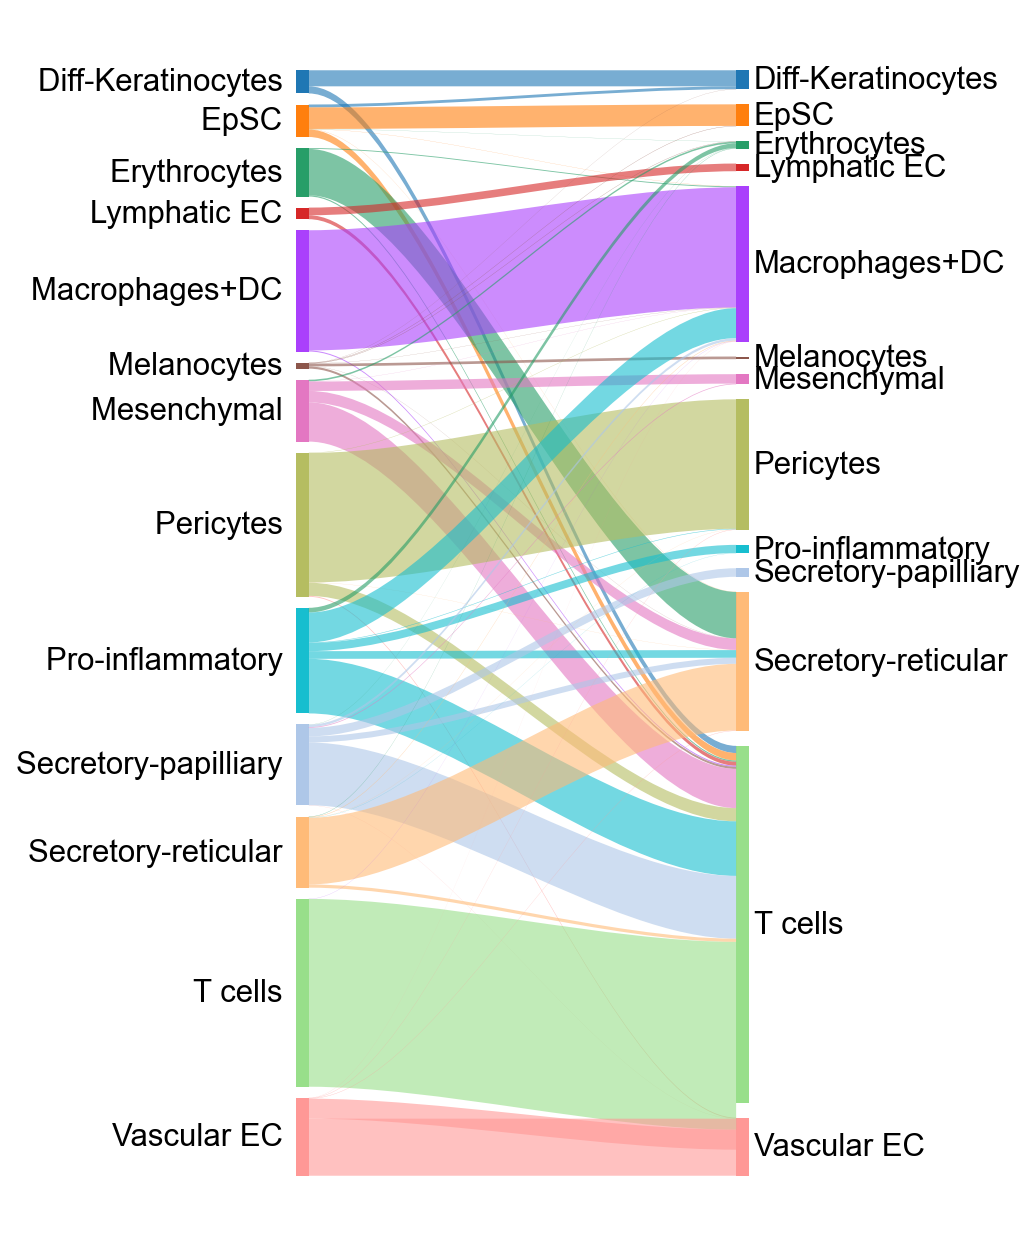

In [401]:
figsize(4,10)
s = Sankey(flows=flows,nodes=nodes, flow_color_mode='lesser',align_y='justify')
s.draw()
plt.savefig('figures/PBMC_sanky_before.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

In [ ]:
new_ad=ad[ad.obs['batch']=='0'].copy()
tmp=new_ad.obs.groupby(['cell', 'predict']).size()
left_cols=pd.Series(new_ad.uns['cell_colors'],index=new_ad.obs.cell.cat.categories)
right_cols=pd.Series(new_ad.uns['predict_colors'],index=new_ad.obs.predict.cat.categories)
flows=[]
nodes=[[],[]]

#for i in new_ad.obs[['subclass_label', 'predict']].value_counts().items():
for i in tmp.items():
    if i[1]>0:
        flows.append((i[0][0]+' ',i[0][1],i[1]))
        
for i in new_ad.obs.cell.value_counts().items():
    if i[1]>2000:
        nodes[0].append((i[0]+' ',2000,{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=18),'color':left_cols[i[0]]}))
    else:
        nodes[0].append((i[0]+' ',i[1],{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=18),'color':left_cols[i[0]]}))
for i in new_ad.obs.predict0.value_counts().items():
    if i[1]>2000:
        nodes[1].append((i[0],2000,{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=18),'color':right_cols[i[0]]}))
    else:
        nodes[1].append((i[0],i[1],{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=18),'color':right_cols[i[0]]}))

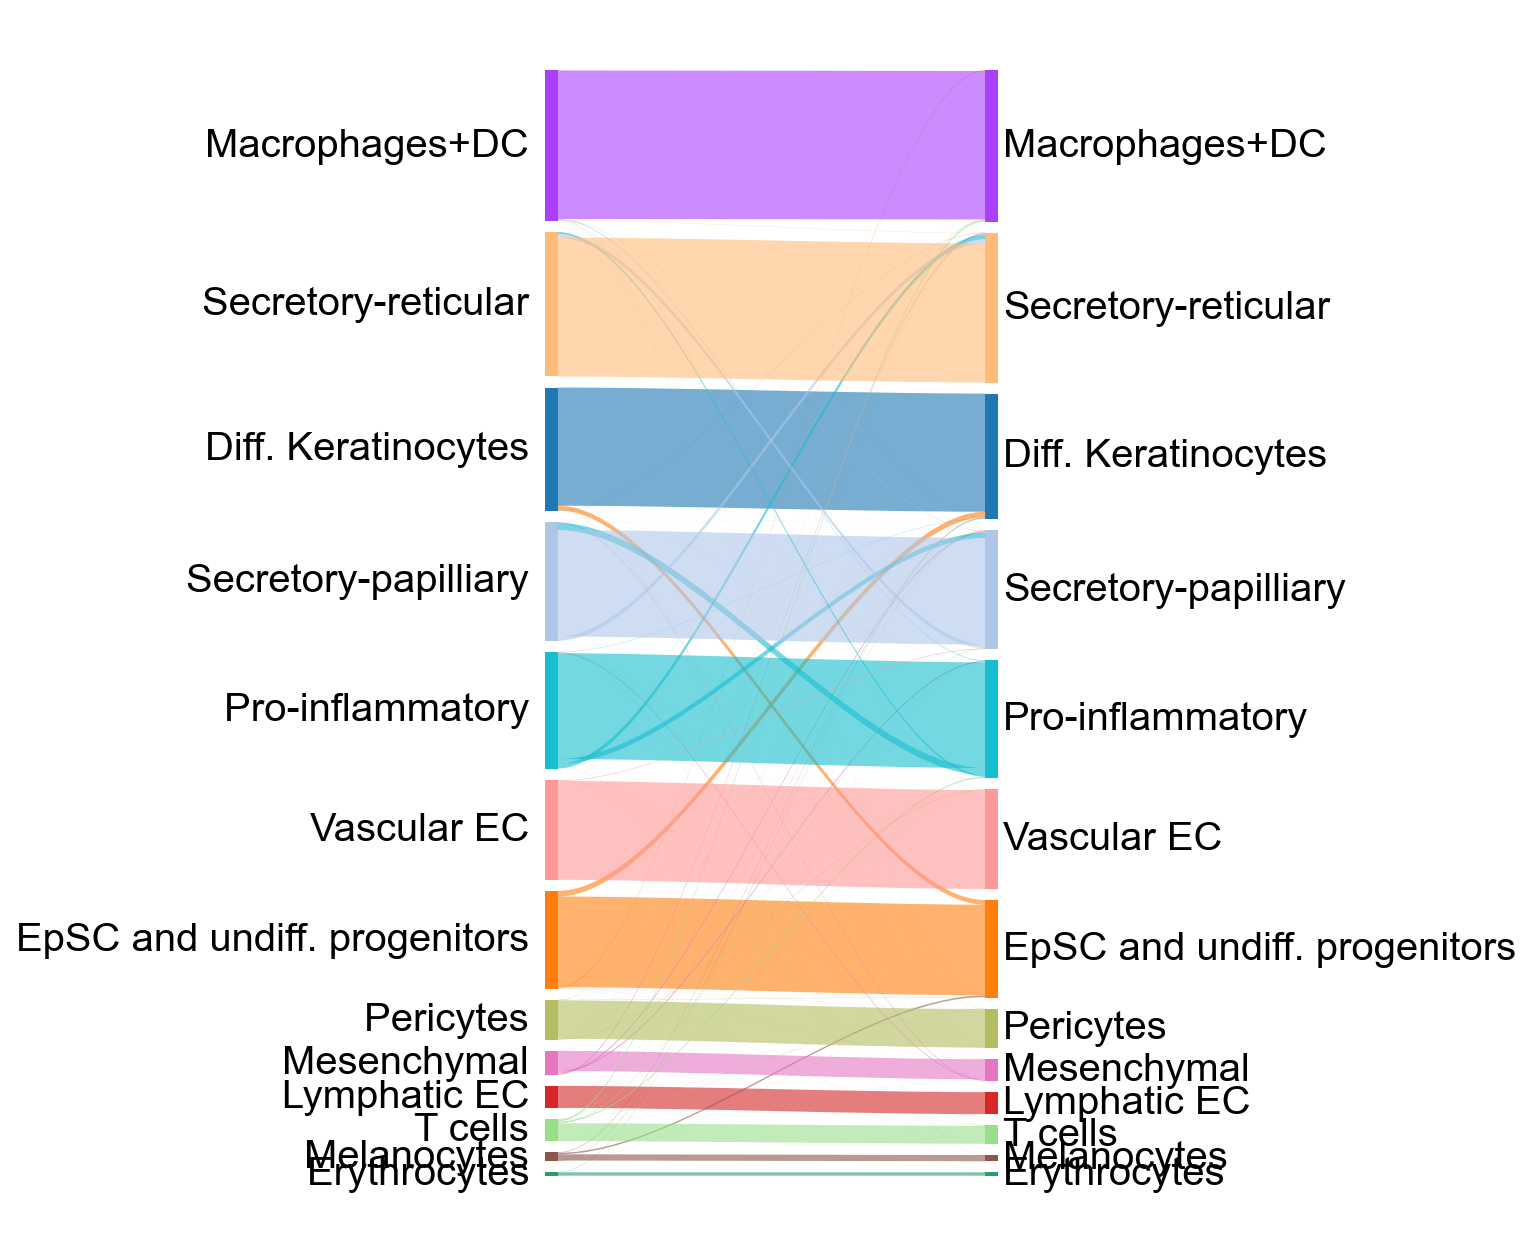

In [477]:
figsize(4,10)
s = Sankey(flows=flows,nodes=nodes, flow_color_mode='lesser',align_y='justify')
s.draw()

# After scDenorm

In [ ]:
ad3=scdenorm(ad3,by='age')

In [130]:
ad3.X.data

array([2., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [131]:
sc.pp.normalize_total(ad3, target_sum=1e4)
sc.pp.log1p(ad3)

In [132]:
ad3.X.data

array([2.1333666, 1.5521525, 1.5521525, ..., 2.1059625, 2.1059625,
       2.1059625], dtype=float32)

In [133]:
sc.pp.highly_variable_genes(
    ad3,
    #flavor= 'seurat_v3',
    n_top_genes=2000,
    batch_key='sample',
    subset=False)

In [134]:
ad3.var.highly_variable.sum()

2000

In [135]:
sc.tl.pca(ad3, svd_solver='arpack', use_highly_variable=True)
sc.pp.neighbors(ad3)
sc.tl.umap(ad3)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


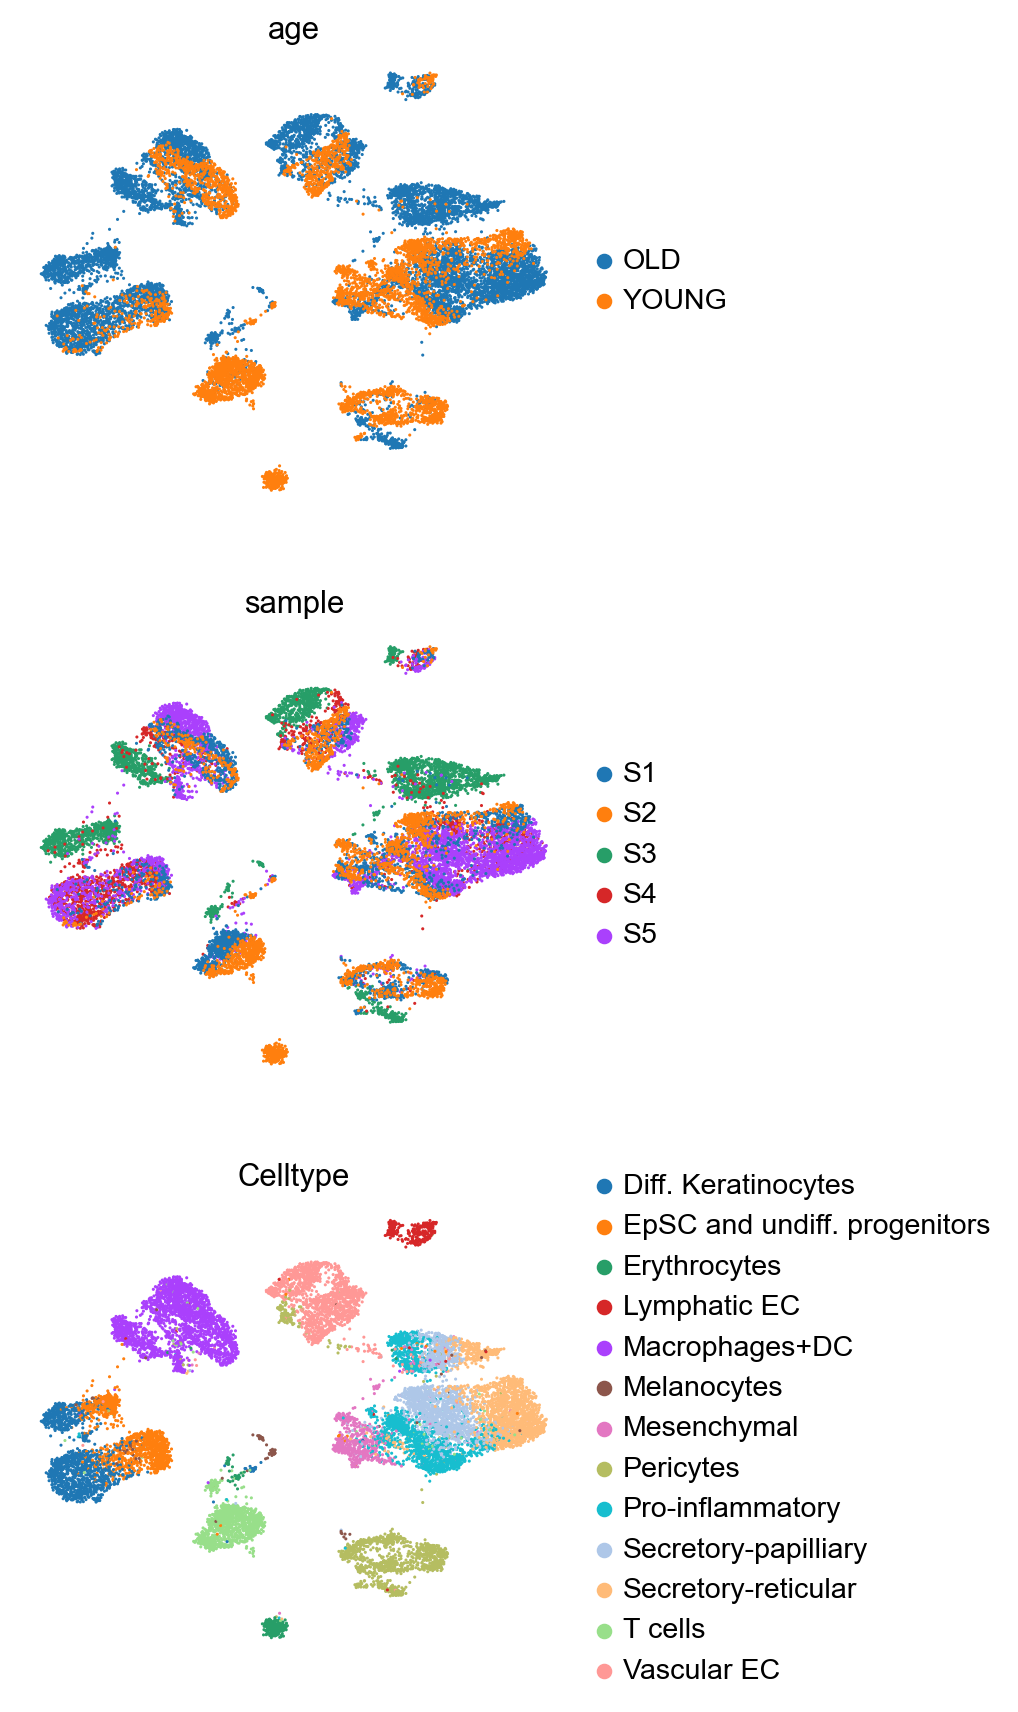

In [136]:
sc.pl.umap(ad3, color=['age','sample','Celltype'],ncols=1)

In [137]:
ad3.obsm['X_umap_raw']=ad3.obsm['X_umap']

In [138]:
sc.external.pp.harmony_integrate(ad3, key = ['age','sample'])

2024-07-25 16:32:35,277 - harmonypy - INFO - Iteration 1 of 10
2024-07-25 16:32:43,415 - harmonypy - INFO - Iteration 2 of 10
2024-07-25 16:32:50,237 - harmonypy - INFO - Iteration 3 of 10
2024-07-25 16:33:02,113 - harmonypy - INFO - Iteration 4 of 10
2024-07-25 16:33:12,380 - harmonypy - INFO - Iteration 5 of 10
2024-07-25 16:33:33,520 - harmonypy - INFO - Converged after 5 iterations


In [139]:
ad3.obsm['X_umap_1']=ad3.obsm['X_umap']

In [140]:
sc.pp.neighbors(ad3, use_rep='X_pca_harmony')
sc.tl.umap(ad3)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


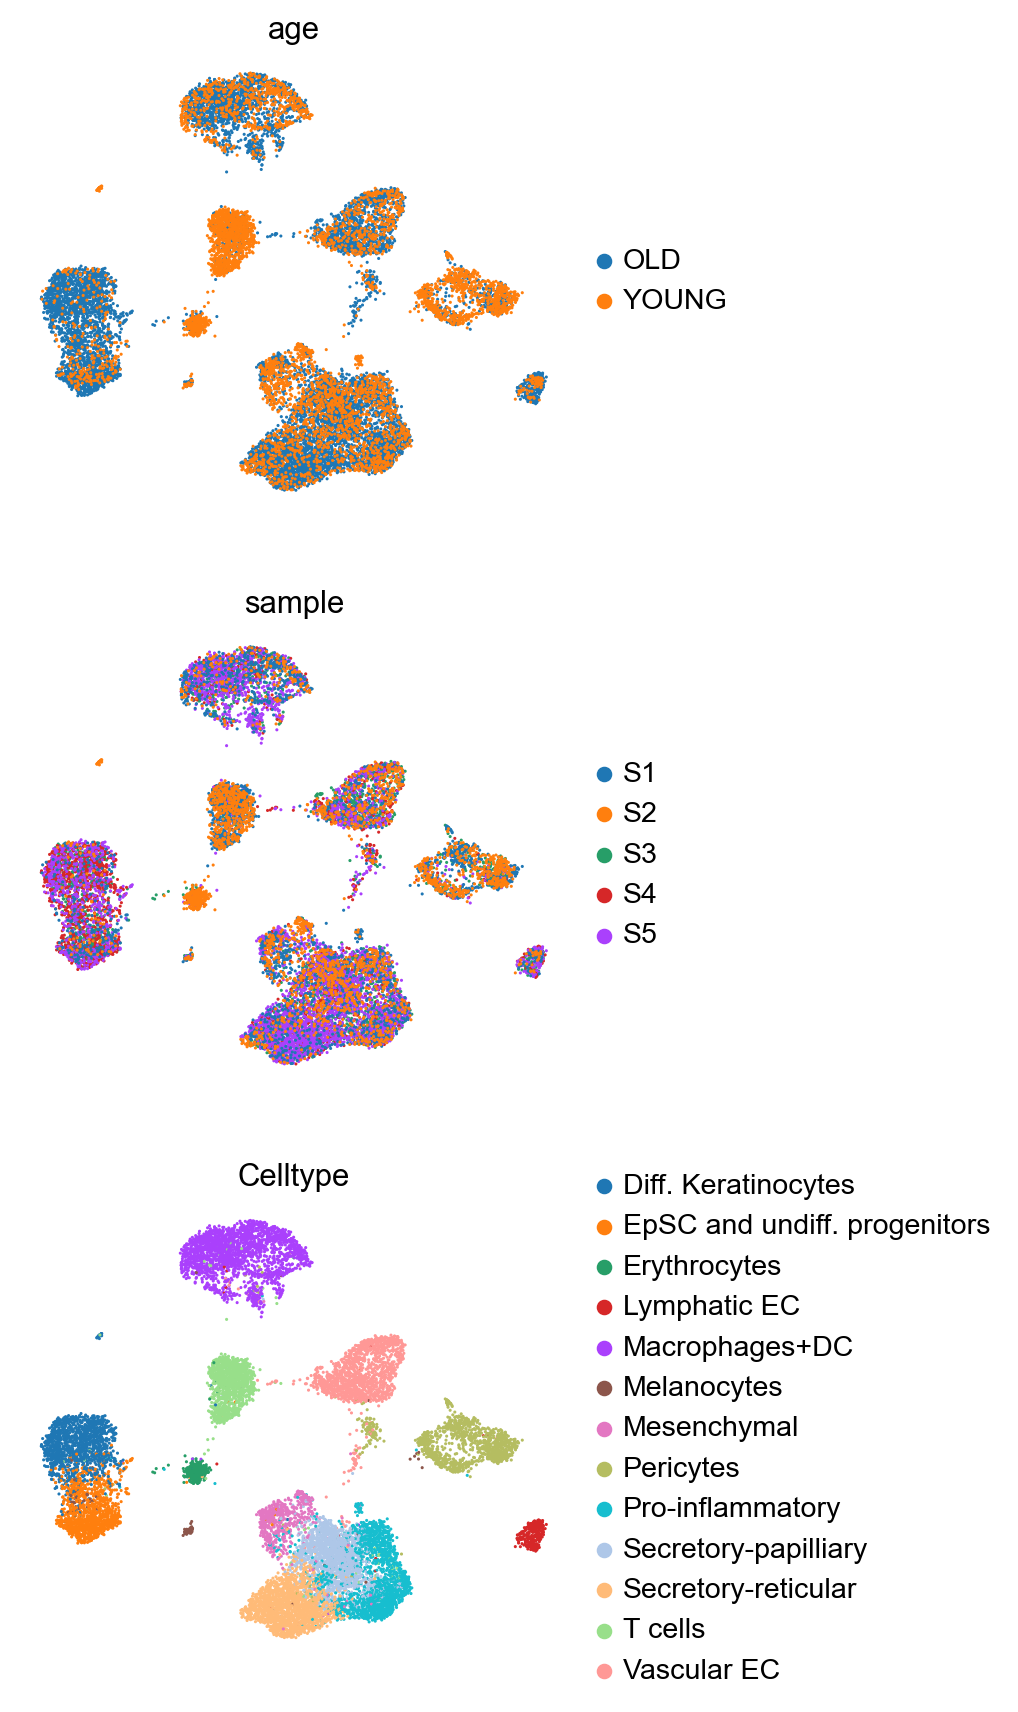

In [141]:
sc.pl.umap(ad3, color=['age','sample','Celltype'],ncols=1)

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping prov

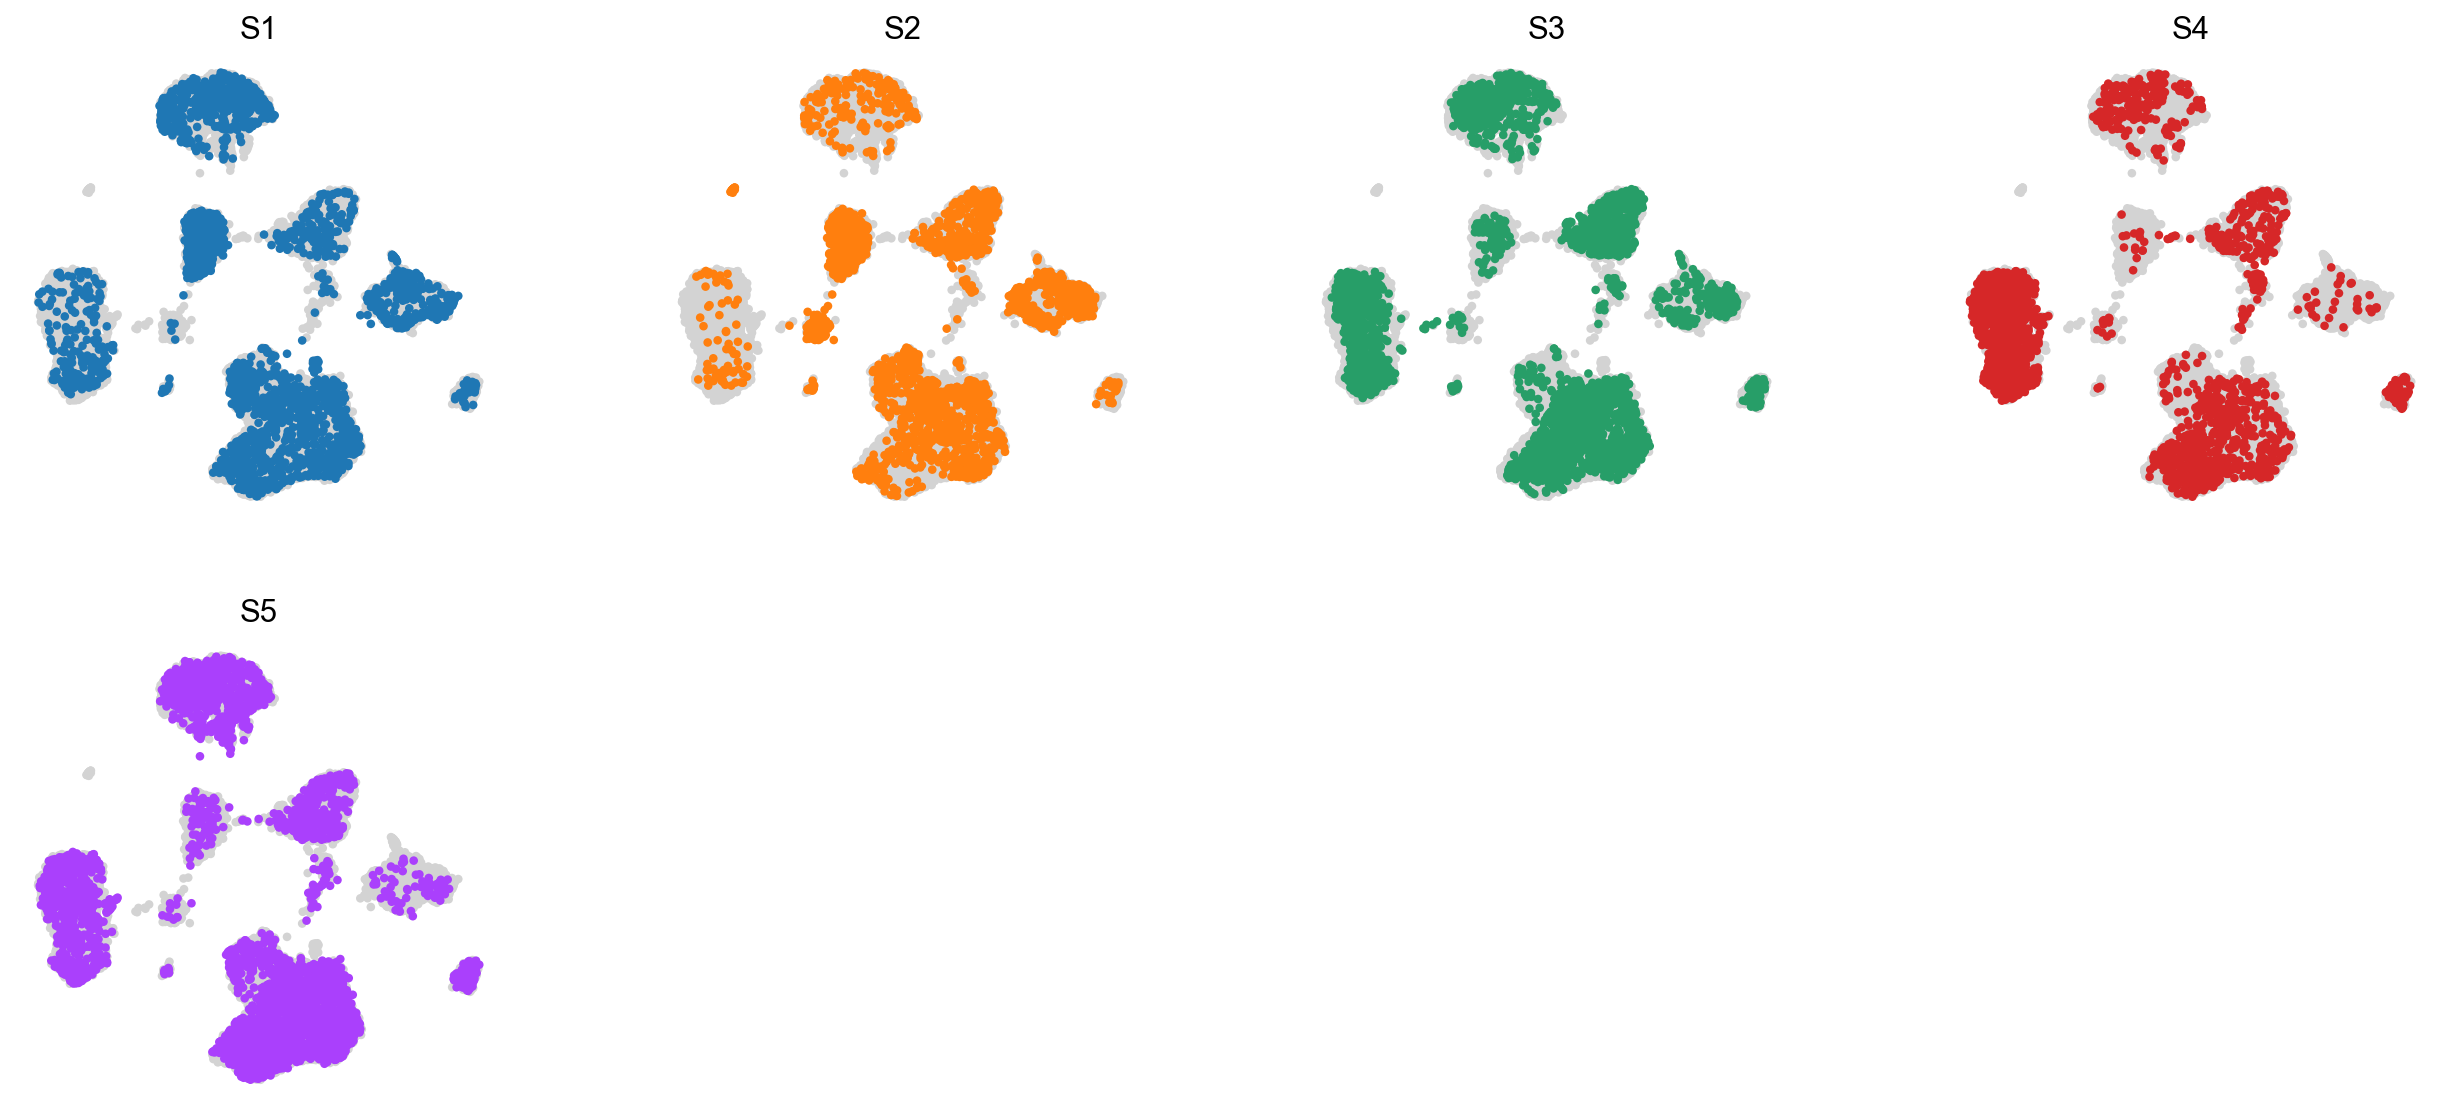

In [142]:
cluster_small_multiples(ad3,'sample')

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping prov

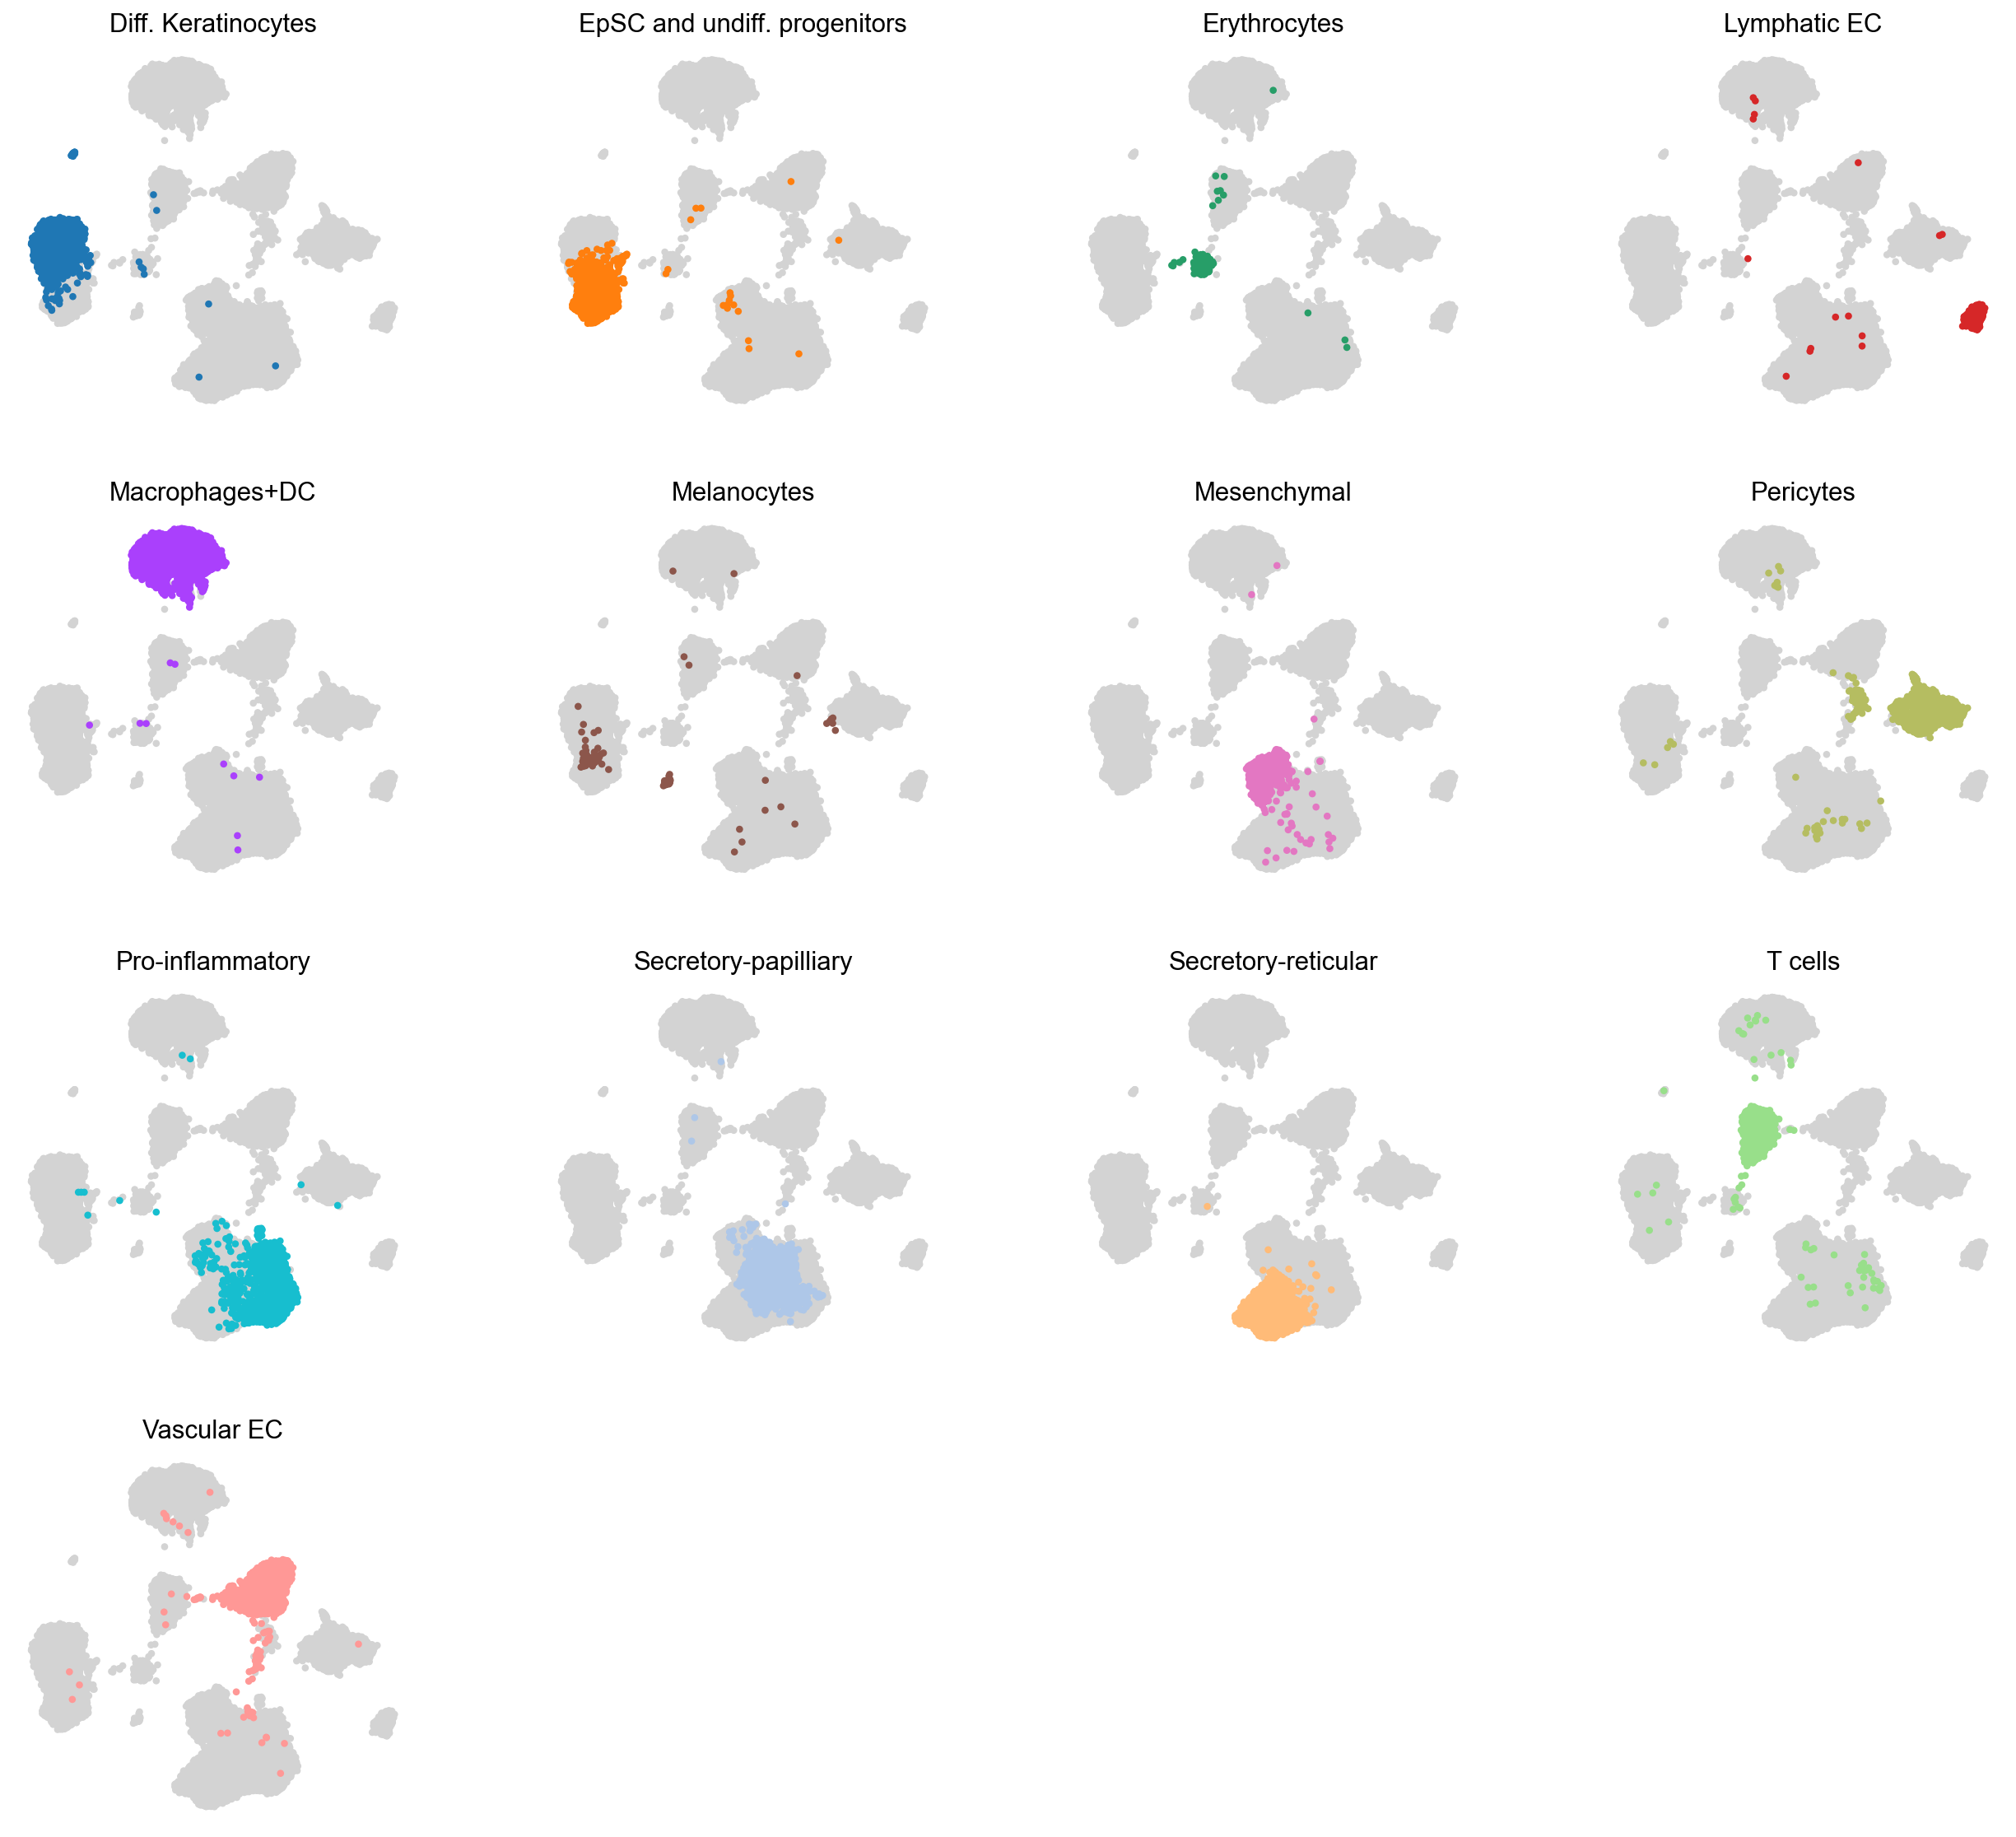

In [143]:
cluster_small_multiples(ad3,'Celltype')

In [144]:
ad=ad3.copy()

In [145]:
ad.obs['cell']=list(ad.obs['Celltype'])

In [146]:
ad.obs.batch.value_counts()

0    10003
1     5454
Name: batch, dtype: int64

In [147]:
ad.obs.cell

cellId
AAATGCCAGGCCCTTG-3-0         T cells
ACGGGTCCAATCCAAC-3-0         T cells
ACTATCTCAGGTCTCG-3-0         T cells
AGAATAGAGGCTATCT-3-0         T cells
AGCAGCCAGGATGGTC-3-0         T cells
                            ...     
TTGGCAACAGTAAGCG-2-1    Erythrocytes
TTTACTGTCAGTGTTG-2-1    Erythrocytes
TTTATGCTCAGCGATT-2-1    Erythrocytes
TTTCCTCAGGTGCACA-2-1    Erythrocytes
TTTGCGCTCAGCTTAG-2-1    Erythrocytes
Name: cell, Length: 15457, dtype: object

In [148]:
adx0 = ad[ad.obs['batch']=='0',:].copy()
adx1 = ad[ad.obs['batch']=='1',:].copy()

Mean CV accuracy: 0.9304
Accuracy on the training set: 0.9496
Accuracy on the hold-out set: 0.9322


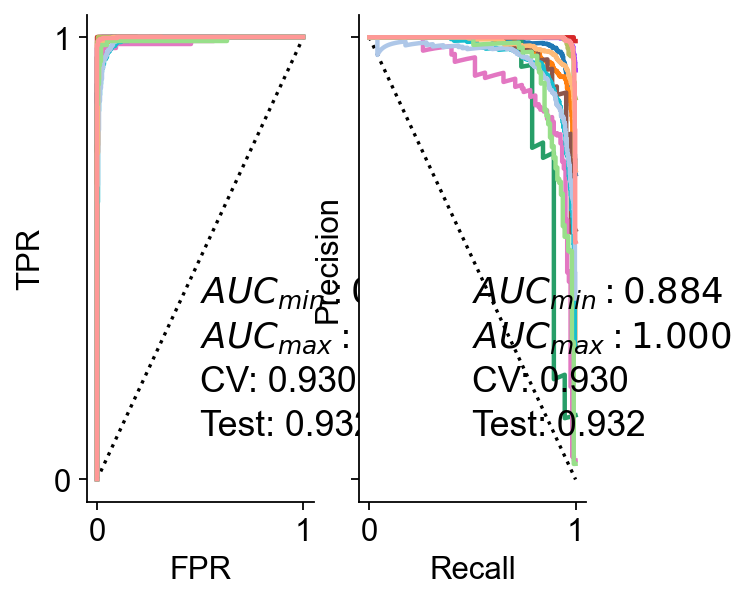

In [152]:
figsize(4,4)
np.random.seed(0)
random.seed(0)
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adx0.obsm['X_pca_harmony'], adx0.obs['cell'])
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

In [153]:
ad.obs['predict0'] = clf.predict(ad.obsm['X_pca_harmony'])

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


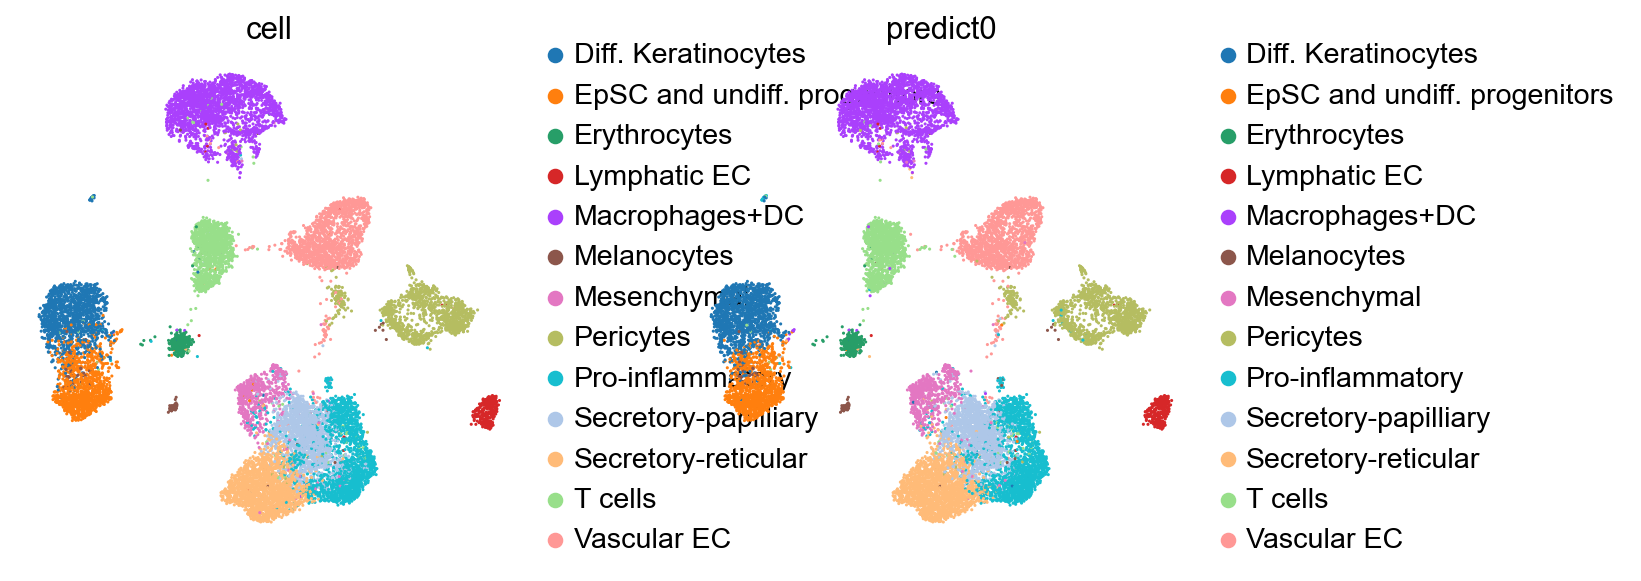

In [154]:
figsize(4,4)
sc.pl.umap(ad, color=['cell','predict0'])

In [48]:
ad.obs['predict0']=ad.obs['predict0'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})

In [49]:
ad.obs['cell']=ad.obs['cell'].replace({'Diff. Keratinocytes':'Diff-Keratinocytes','EpSC and undiff. progenitors':'EpSC'})

In [50]:
ad.write_h5ad('results/SKIN_after_scDenorm.h5ad')

In [158]:
adx0 = ad[ad.obs['batch']=='0',:].copy()
adx1 = ad[ad.obs['batch']=='1',:].copy()

In [159]:
df = ad[ad.obs.batch=='0'].obs.groupby(["cell", "predict0"]).size().unstack(fill_value=0)

In [161]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

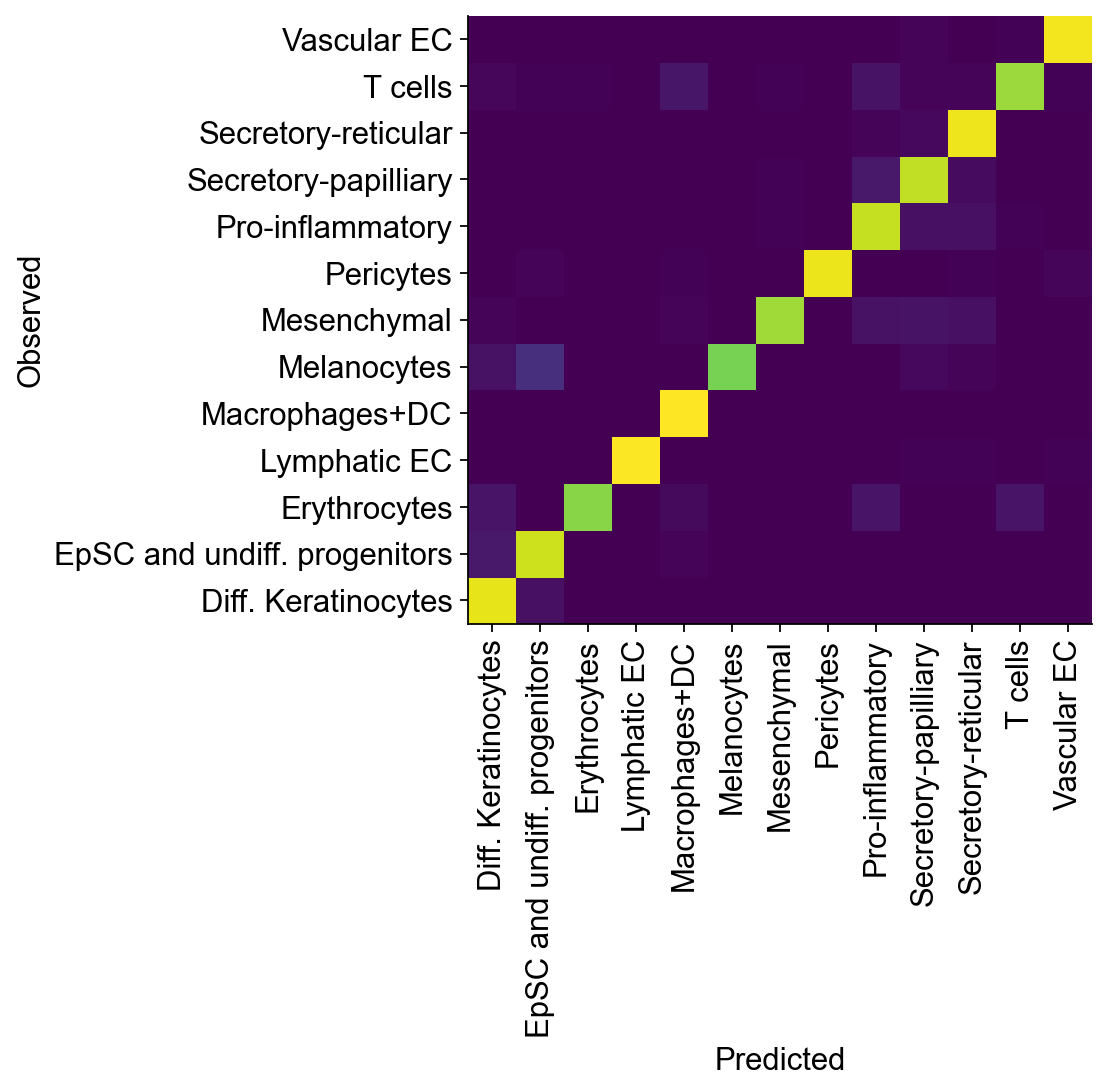

In [162]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

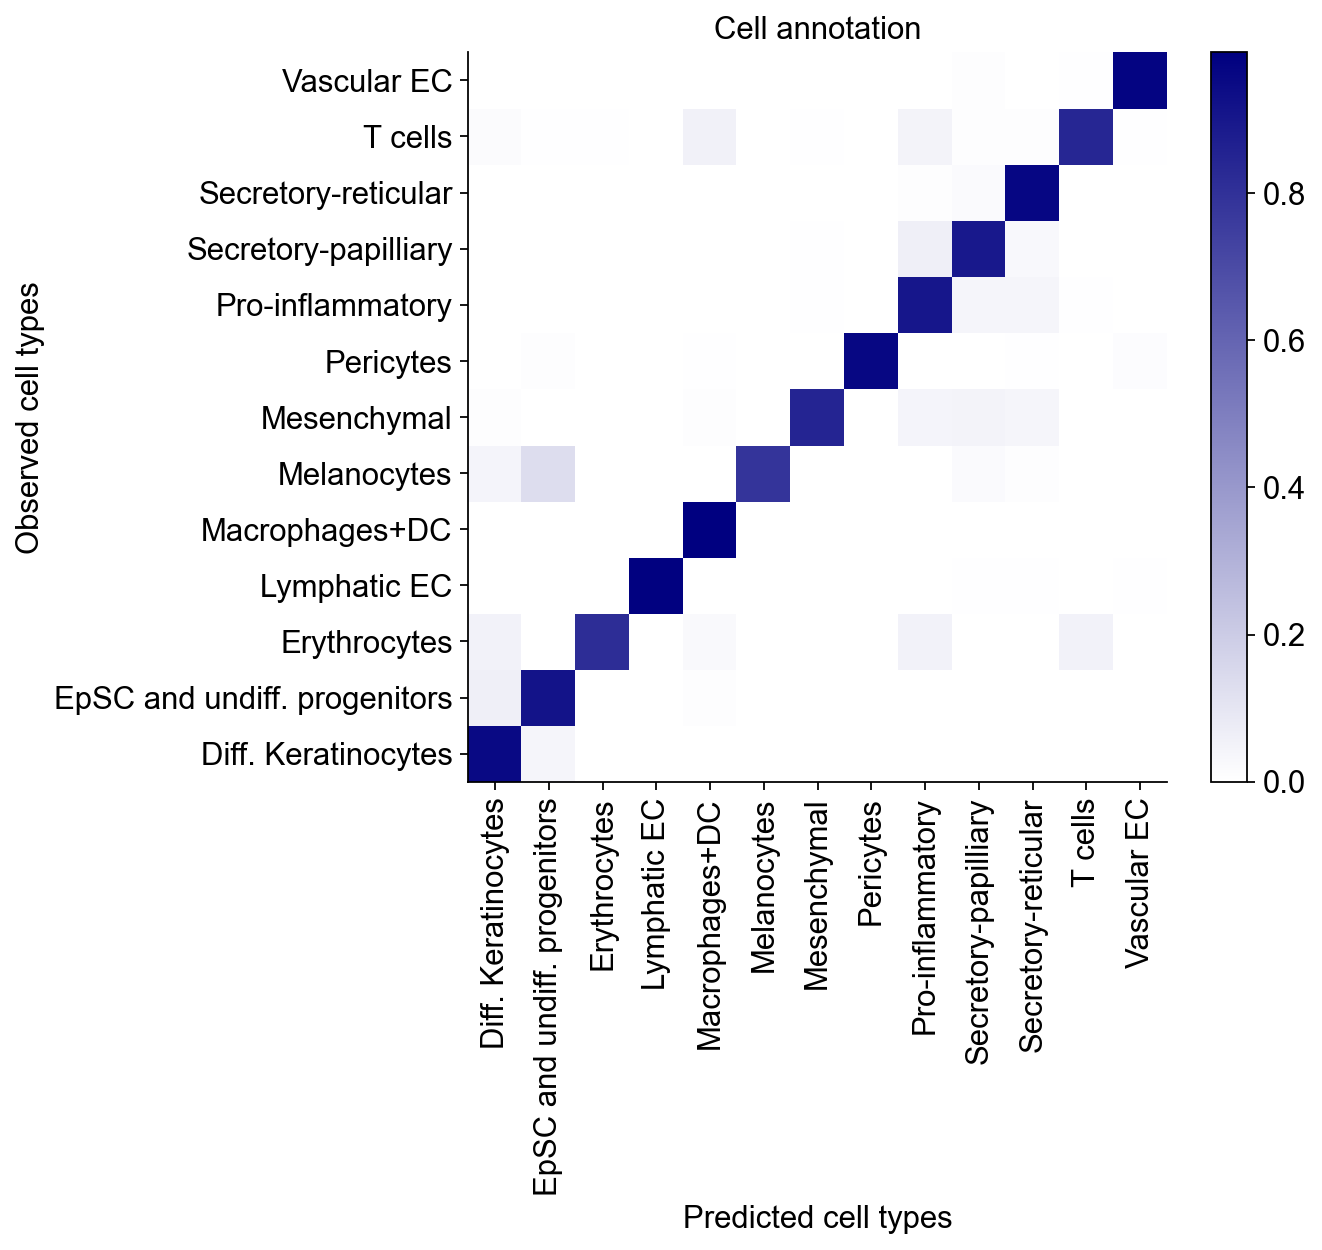

In [163]:
colors = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a']
cmap = mcolors.ListedColormap(colors)
color_stops = [(0.0, (1.0, 1.0, 1.0)),  # white
               (1.0, (0.0, 0.0, 0.5))]  # deep blue

# create the custom colormap using LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom', color_stops)

fig, ax = plt.subplots(figsize=(7, 6))
#plt.figure(figsize=(8, 8))
pcolor = plt.pcolor(conf_mat,cmap=cmap)
_ = plt.xticks(np.arange(0.5, len(conf_mat.columns), 1), conf_mat.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(conf_mat.index), 1), conf_mat.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
# remove the x-tick labels
#_ = ax.set_xticklabels([])
title=ax.set_title("Cell annotation")
title.set_fontsize(14)
ax.set_xlabel("Predicted cell types")
ax.set_ylabel("Observed cell types")
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("bottom", size="5%", pad=0.3)

fig.colorbar(pcolor)#, cax=cax, orientation='horizontal')
#plt.xlabel(" ")
#plt.ylabel(" ")
#plt.savefig('figures/adult_scAnnot_model_accuracy_v1.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [164]:
df = ad[ad.obs.batch=='1'].obs.groupby(["cell", "predict0"]).size().unstack(fill_value=0)

In [165]:
df

predict0                      Diff. Keratinocytes  \
cell                                                
Diff. Keratinocytes                            93   
EpSC and undiff. progenitors                   12   
Erythrocytes                                    0   
Lymphatic EC                                    0   
Macrophages+DC                                  0   
Melanocytes                                     0   
Mesenchymal                                     1   
Pericytes                                       0   
Pro-inflammatory                                0   
Secretory-papilliary                            0   
Secretory-reticular                             0   
T cells                                         1   
Vascular EC                                     0   

predict0                      EpSC and undiff. progenitors  Erythrocytes  \
cell                                                                       
Diff. Keratinocytes                                      7             0   
EpSC and undiff. progenitors                           157             1   
Erythrocytes                                             0           271   
Lymphatic EC                                             0             0   
Macrophages+DC                                           0             0   
Melanocytes                                              0             0   
Mesenchymal                                              0             0   
Pericytes                                                0             0   
Pro-inflammatory                                         2             1   
Secretory-papilliary                                     0             0   
Secretory-reticular                                      0             0   
T cells                                                  0             3   
Vascular EC                                              0             0   

predict0                      Lymphatic EC  Macrophages+DC  Melanocytes  \
cell                                                                      
Diff. Keratinocytes                      0               0            1   
EpSC and undiff. progenitors             0               0            1   
Erythrocytes                             0               1            0   
Lymphatic EC                            65               0            0   
Macrophages+DC                           0             675            0   
Melanocytes                              0               1           31   
Mesenchymal                              0               0            0   
Pericytes                                0               1            0   
Pro-inflammatory                         0               0            4   
Secretory-papilliary                     0               0            0   
Secretory-reticular                      0               0            1   
T cells                                  0               3            0   
Vascular EC                              0               0            0   

predict0                      Mesenchymal  Pericytes  Pro-inflammatory  \
cell                                                                     
Diff. Keratinocytes                     1          0                24   
EpSC and undiff. progenitors            7          1                 1   
Erythrocytes                            0          0                 0   
Lymphatic EC                            0          0                 0   
Macrophages+DC                          1          2                 0   
Melanocytes                             0          1                 0   
Mesenchymal                           326          0                 8   
Pericytes                               0        799                 6   
Pro-inflammatory                       20          3               527   
Secretory-papilliary                    6          0                24   
Secretory-reticular                     1        

In [166]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

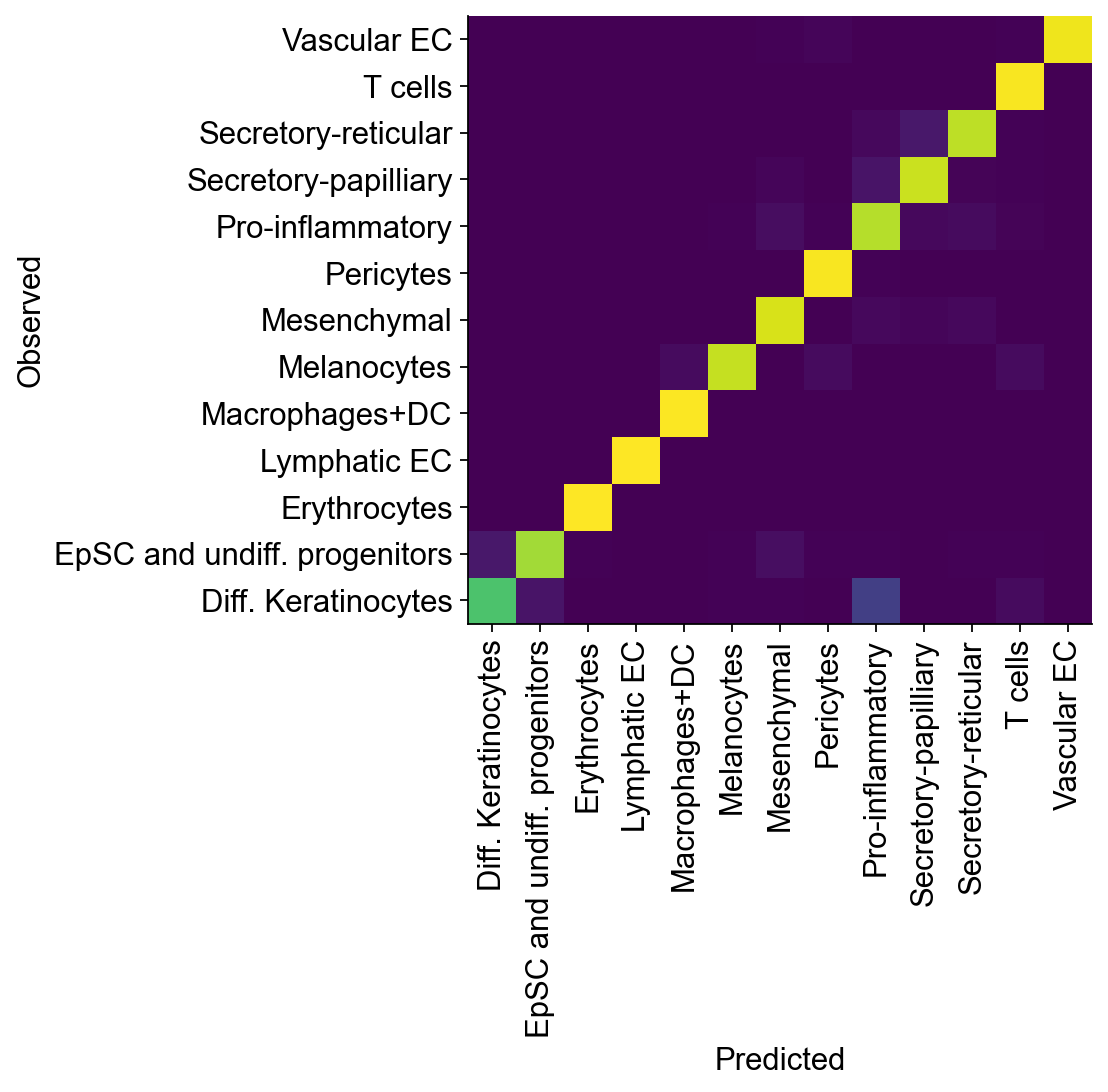

In [167]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

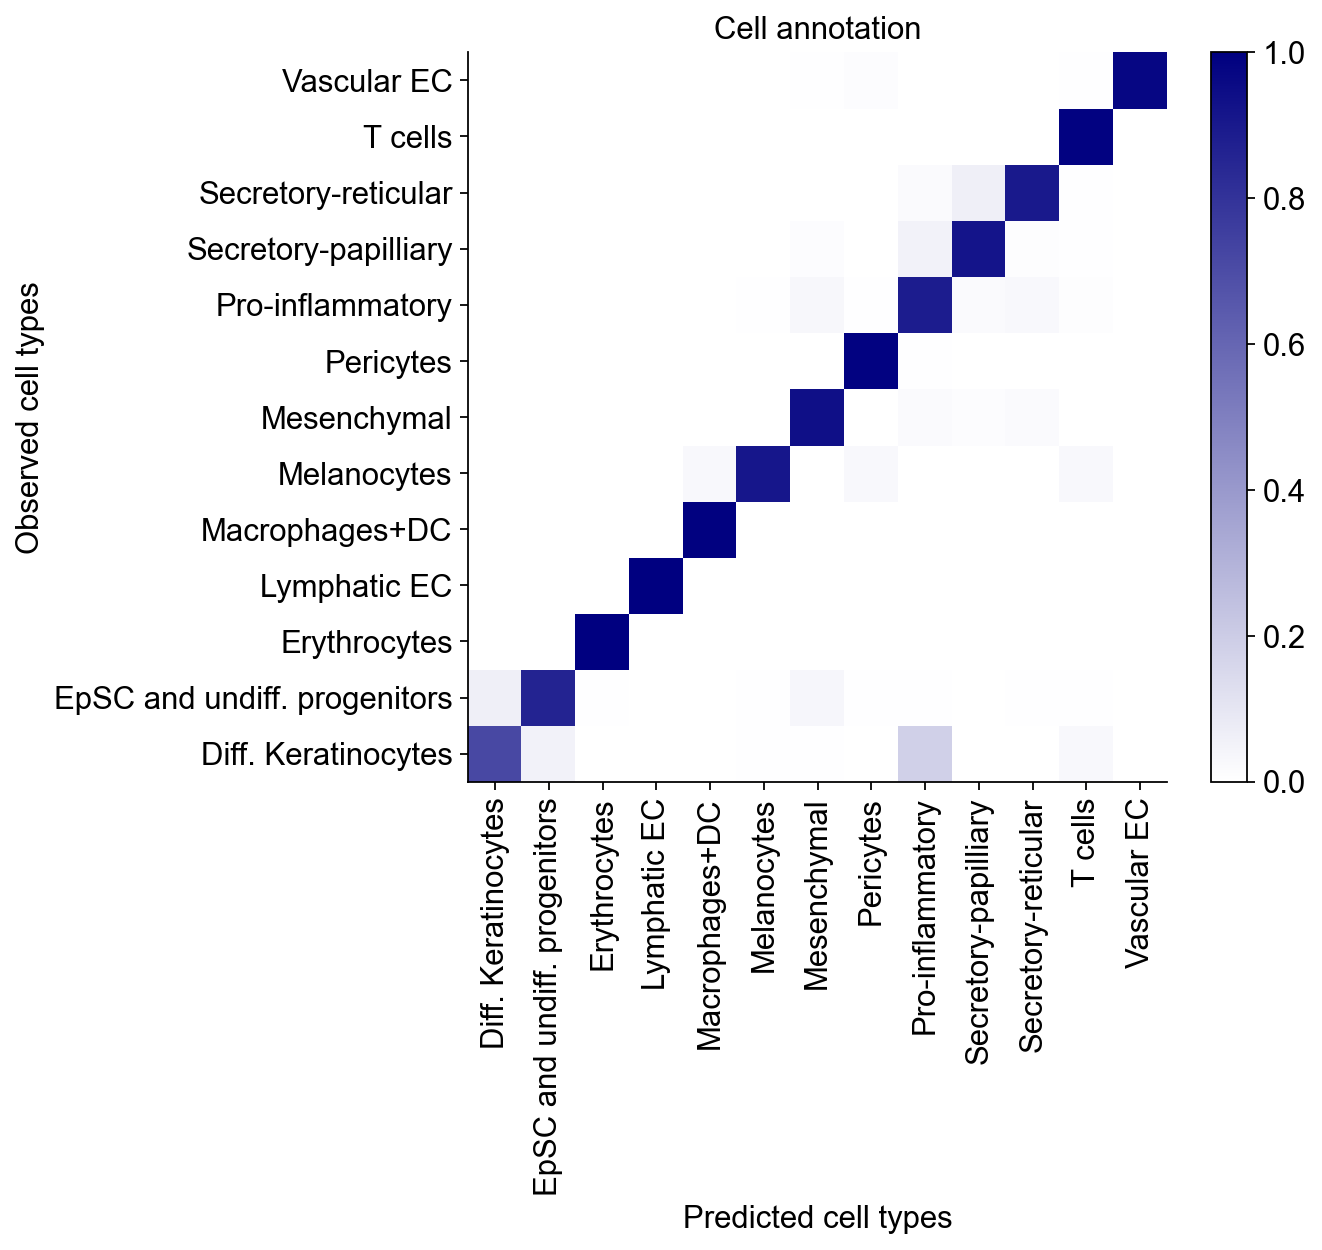

In [168]:
colors = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a']
cmap = mcolors.ListedColormap(colors)
color_stops = [(0.0, (1.0, 1.0, 1.0)),  # white
               (1.0, (0.0, 0.0, 0.5))]  # deep blue

# create the custom colormap using LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom', color_stops)

fig, ax = plt.subplots(figsize=(7, 6))
#plt.figure(figsize=(8, 8))
pcolor = plt.pcolor(conf_mat,cmap=cmap)
_ = plt.xticks(np.arange(0.5, len(conf_mat.columns), 1), conf_mat.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(conf_mat.index), 1), conf_mat.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
# remove the x-tick labels
#_ = ax.set_xticklabels([])
title=ax.set_title("Cell annotation")
title.set_fontsize(14)
ax.set_xlabel("Predicted cell types")
ax.set_ylabel("Observed cell types")
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("bottom", size="5%", pad=0.3)

fig.colorbar(pcolor)#, cax=cax, orientation='horizontal')
#plt.xlabel(" ")
#plt.ylabel(" ")
#plt.savefig('figures/adult_scAnnot_model_accuracy_v1.pdf',dpi=300, bbox_inches='tight',transparent=True)

# Sankey plot

# plot

In [339]:
new_ad=ad[ad.obs['batch']=='1'].copy()
tmp=new_ad.obs.groupby(['cell', 'predict0']).size()
left_cols=pd.Series(new_ad.uns['cell_colors'],index=new_ad.obs.cell.cat.categories)
right_cols=pd.Series(new_ad.uns['predict0_colors'],index=new_ad.obs.predict0.cat.categories)
flows=[]
nodes=[[],[]]

#for i in new_ad.obs[['subclass_label', 'predict']].value_counts().items():
for i in tmp.items():
    if i[1]>0:
        flows.append((i[0][0]+' ',i[0][1],i[1]))
        
for i in new_ad.obs.cell.value_counts()[idx].items():
    if i[1]>2000:
        nodes[0].append((i[0]+' ',2000,{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=18),'color':left_cols[i[0]]}))
    else:
        nodes[0].append((i[0]+' ',i[1],{'label_pos':'left','label_format':'{label}','label_opts':dict(fontsize=18),'color':left_cols[i[0]]}))
for i in new_ad.obs.predict0.value_counts()[idx].items():
    if i[1]>2000:
        nodes[1].append((i[0],2000,{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=18),'color':right_cols[i[0]]}))
    else:
        nodes[1].append((i[0],i[1],{'label_pos':'right','label_format':'{label}','label_opts':dict(fontsize=18),'color':right_cols[i[0]]}))

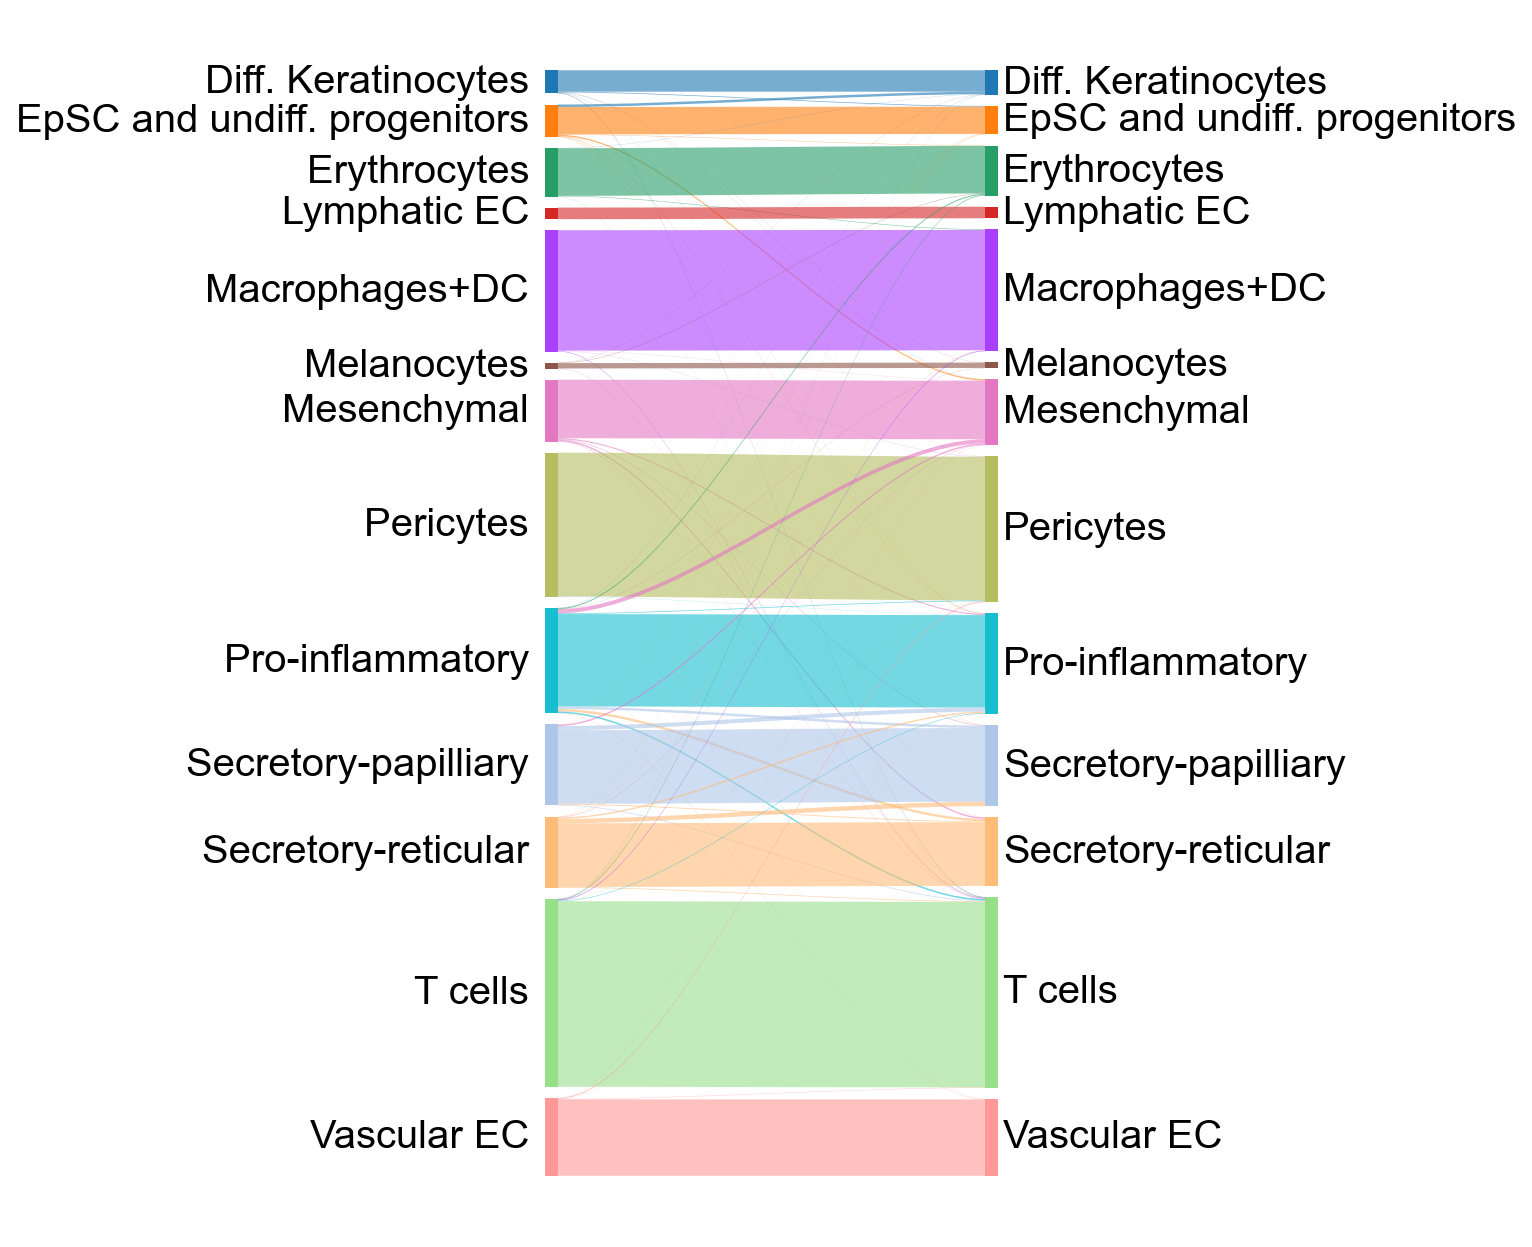

In [340]:
figsize(4,10)
s = Sankey(flows=flows,nodes=nodes, flow_color_mode='lesser',align_y='justify')
s.draw()

# DGE analysis with original labels (Seurat 3.1.2)

In [353]:
gdg=pd.read_csv('42003_2020_922_MOESM3_ESM.csv')
bdg=pd.read_csv('data/integration/SKIN_before_scDenorm_DEG_Seurat3.1.2.csv',index_col=0)
adg=pd.read_csv('data/integration/SKIN_after_scDenorm_DEG_Seurat3.1.2.csv',index_col=0)

In [33]:
from matplotlib_venn import venn3

In [314]:
tmp=pd.DataFrame([[len(set(gdg.loc[gdg.cluster==i,'gene']).intersection(set(bdg.loc[bdg.cluster==i,'gene'])))/len(set(gdg.loc[gdg.cluster==i,'gene'])) for i in range(17)]+[len(set(gdg.loc[gdg.cluster==i,'gene']).intersection(set(adg.loc[adg.cluster==i,'gene'])))/len(set(gdg.loc[gdg.cluster==i,'gene'])) for i in range(17)],
 ['Before scDenorm']*17+['After scDenorm']*17]).T

In [315]:
tmp.columns=['pert','lg']

In [316]:
tmp['celltype']=list(range(17))*2

In [317]:
tmp['celltype']=tmp.celltype.astype(str)

In [51]:
c2c=['Macrophages+DC_1',
 'Secretory-reticular',
 'Pro-inflammatory',
 'Secretory-papilliary',
 'Vascular EC',
 'Diff. Keratinocytes',
 'T cells',
 'EpSC and undiff. progenitors_1',
 'Pericytes_1',
 'Mesenchymal',
 'Pericytes_2',
 'Erythrocytes',
 'Lymphatic EC',
 'Macrophages+DC_2',
 'Melanocytes',
 'EpSC and undiff. progenitors_2',
 'Macrophages+DC_3']

In [318]:
tmp['celltype']=c2c*2
tmp.index=list(tmp.celltype)
tmp1=tmp[tmp.lg=='Before scDenorm']
tmp2=tmp[tmp.lg=='After scDenorm']
tmp1=tmp1.sort_values('pert')
tmp2=tmp2.loc[tmp1.index]
tmp=pd.concat([tmp1,tmp2],axis=0)

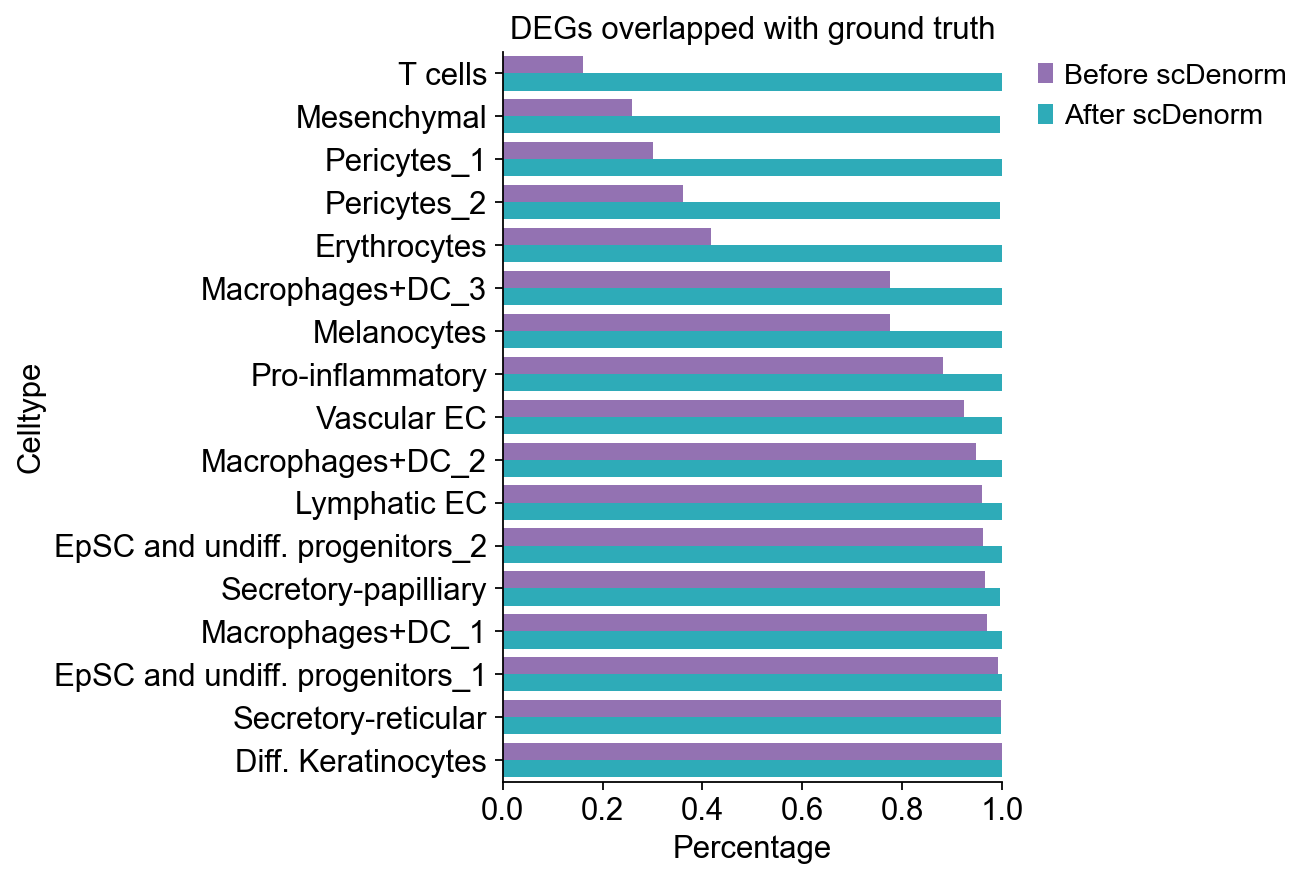

In [319]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.barplot(x='pert', y='celltype', hue='lg', data=tmp, palette=(cmap(4), cmap(9)), ax=ax)

ax.set_xlabel('Percentage')
ax.set_ylabel('Celltype')
ax.set_title('DEGs overlapped with ground truth')
ax.legend(title='',frameon=False)
#ax.set_yticklabels(c2c)
ax.set_xlim(0, 1)

legend = ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False)

plt.savefig('figures/Fit6_DEGs1_new.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

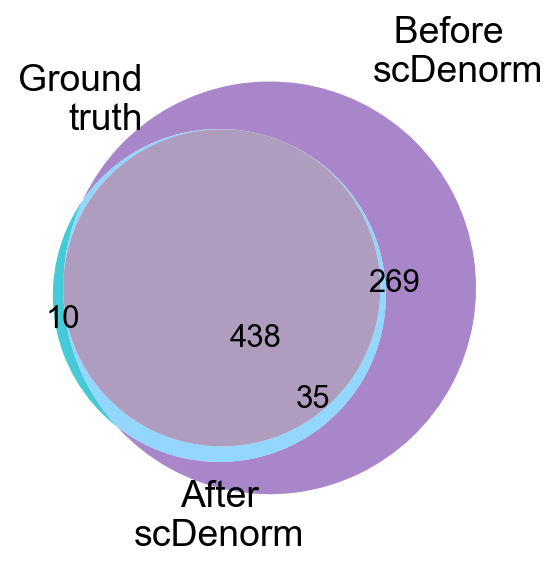

In [352]:
figsize(4,4)
venn3([set(gdg.loc[gdg.cluster==5,'gene']), 
       set(bdg.loc[bdg.cluster==5,'gene']),set(adg.loc[adg.cluster==5,'gene'])], 
      ('Ground\ntruth', '  Before\nscDenorm', 'After\nscDenorm'),
        set_colors=(cmap(3), cmap(4), cmap(9)),alpha=0.8,)
plt.savefig('figures/Fig6_DEG_overlaps.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

## GO plots

In [406]:
gdg=pd.read_csv('data/integration/skin_org_lab_groundgo.csv',index_col=0)
bdg=pd.read_csv('data/integration/SKIN_before_scDenorm_GO_Seurat3.1.2.csv',index_col=0)
adg=pd.read_csv('data/integration/SKIN_after_scDenorm_GO_Seurat3.1.2.csv',index_col=0)

In [327]:
tmp=pd.DataFrame([[len(set(gdg[gdg.celltype==i].Description).intersection(set(bdg[bdg.celltype==i].Description)))/len(set(gdg[gdg.celltype==i].Description)) for i in range(17)]+[len(set(gdg[gdg.celltype==i].Description).intersection(set(adg[adg.celltype==i].Description)))/len(set(gdg[gdg.celltype==i].Description)) for i in range(17)],
 ['Before scDenorm']*17+['After scDenorm']*17]).T

In [328]:
tmp.columns=['pert','lg']

In [329]:
tmp['celltype']=list(range(17))*2

In [330]:
tmp['celltype']=tmp.celltype.astype(str)

In [266]:
idx=tmp1.index

In [331]:
tmp['celltype']=c2c*2
tmp.index=list(tmp.celltype)
tmp1=tmp[tmp.lg=='Before scDenorm']
tmp2=tmp[tmp.lg=='After scDenorm']
tmp1=tmp1.loc[idx]
tmp2=tmp2.loc[idx]
tmp=pd.concat([tmp1,tmp2],axis=0)

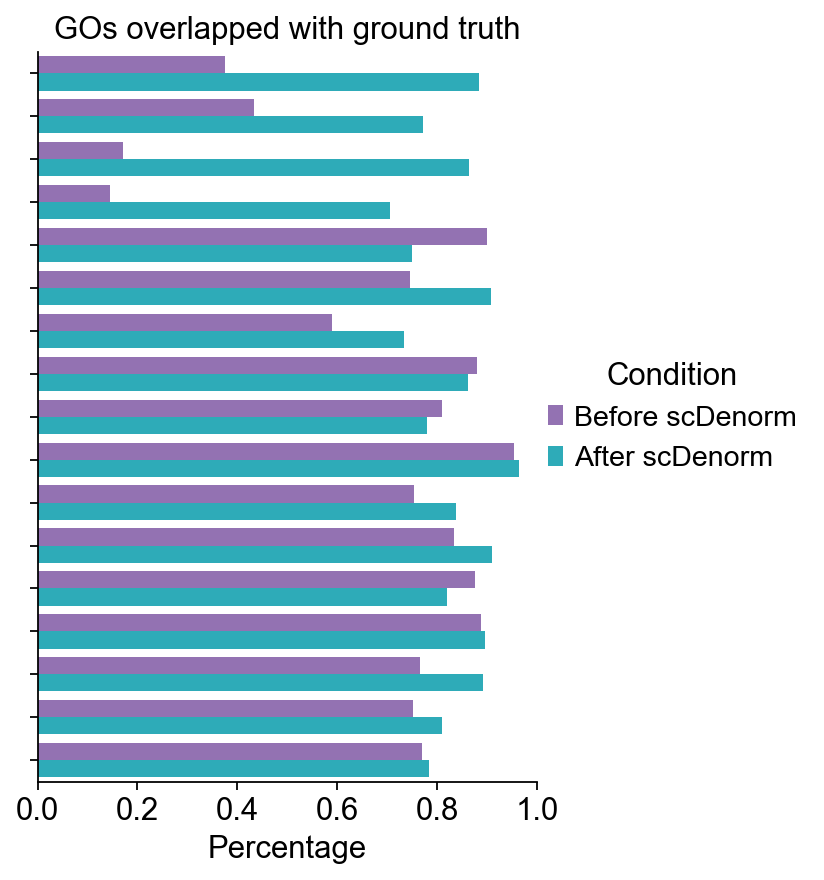

In [334]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.barplot(x='pert', y='celltype', hue='lg', data=tmp,palette=(cmap(4), cmap(9)), ax=ax)

ax.set_xlabel('Percentage')
ax.set_ylabel('')
ax.set_title('GOs overlapped with ground truth')
ax.legend(title='',frameon=False)
ax.set_yticklabels([])
ax.set_xlim(0, 1)

legend = ax.legend(title='Condition', bbox_to_anchor=(1.0, 0.5), loc='center left', borderaxespad=0, frameon=False)

plt.savefig('figures/Fit6_GOs1_new.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

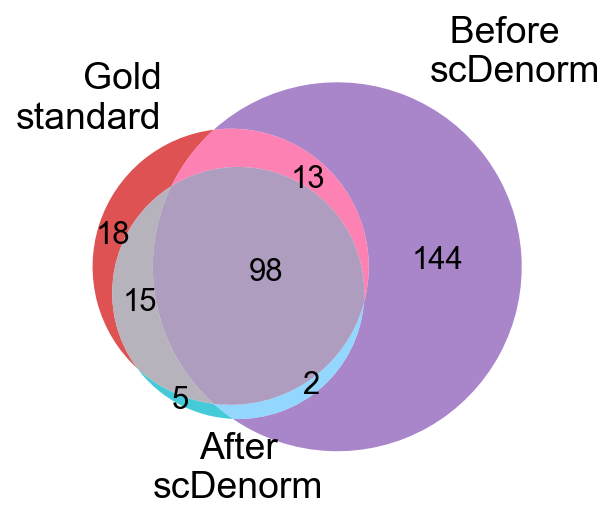

In [409]:
figsize(4,4)
venn3([set(gdg[gdg.celltype==5].Description), 
       set(bdg[bdg.celltype==5].Description),set(adg[adg.celltype==5].Description)], 
      ('Gold\nstandard', '  Before\nscDenorm', 'After\nscDenorm'),
        set_colors=(cmap(3), cmap(4), cmap(9)),alpha=0.8,)
plt.savefig('figures/Fig6_GO_overlaps.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')

## GO heatmap

In [10]:
gdg=pd.read_csv('data/integration/skin_org_lab_groundgo.csv',index_col=0)
bdg=pd.read_csv('data/integration/SKIN_before_scDenorm_GO_Seurat3.1.2.csv',index_col=0)
adg=pd.read_csv('data/integration/SKIN_after_scDenorm_GO_Seurat3.1.2.csv',index_col=0)

In [11]:
gdg=gdg[gdg.celltype==5]
gdg['group']='Gold\nstandard'
bdg=bdg[bdg.celltype==5]
bdg['group']='Before\nscDenorm'
adg=adg[adg.celltype==5]
adg['group']='After\nscDenorm'

In [12]:
go=pd.concat([gdg,bdg,adg],axis=0)

In [13]:
go_terms_keratinocytes = [
    'keratinocyte differentiation',
    'epidermal cell differentiation',
    'keratinization',
    'establishment of skin barrier',
    'epidermis development',
    'cell-cell junction organization',
    'desmosome organization',
    'intermediate filament cytoskeleton organization',
    'regulation of epidermal cell differentiation',
    'skin development',
    'epithelial cell migration',
    'regulation of wound healing',
    'regulation of keratinocyte differentiation',
    'positive regulation of epithelial cell proliferation',
    'cornification',
    'intermediate filament organization',
    'negative regulation of MAPK cascade',
    'response to wounding',
    'neutrophil activation involved in immune response',
    'regulation of water loss via skin'
]

In [14]:
go_terms_unrelated_to_keratinocytes = [
    'cytoplasmic translational initiation',
    'nuclear transport',
    'nucleocytoplasmic transport',
    'positive regulation of translation',
    'formation of cytoplasmic translation initiation complex',
    'establishment of protein localization to mitochondrion',
    'interleukin-12-mediated signaling pathway',
    'cellular response to interleukin-12',
    'positive regulation of intracellular transport',
    'regulation of intrinsic apoptotic signaling pathway',
    'RNA localization',
    'mitochondrial transport',
    'electron transport chain',
    'import into nucleus',
    'regulation of mRNA metabolic process',
    'RNA export from nucleus',
    'translational elongation',
    'regulation of cytoplasmic translation',
    'positive regulation of intracellular protein transport',
    'nucleobase-containing compound transport'
]

In [15]:
go_terms = go_terms_keratinocytes+go_terms_unrelated_to_keratinocytes

In [26]:
tmp=go

# 选择前20个 Description
tmp1 = tmp[tmp['Description'].isin(go_terms)]

# 计算 -log10(qvalue)
tmp1['logq'] = -np.log10(tmp1['p.adjust'])

# 对 Description 列进行排序
tmp1['Description'] = pd.Categorical(tmp1['Description'], categories=go_terms, ordered=True)

# 对 Celltype 列进行分类
tmp1['group'] = pd.Categorical(tmp1['group'], categories=['Gold\nstandard', 'Before\nscDenorm', 'After\nscDenorm'], ordered=True)

/tmp/ipykernel_42611/4170062529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['logq'] = -np.log10(tmp1['p.adjust'])
/tmp/ipykernel_42611/4170062529.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['Description'] = pd.Categorical(tmp1['Description'], categories=go_terms, ordered=True)
/tmp/ipykernel_42611/4170062529.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [27]:
tmp2 = tmp1.pivot(index='Description', columns='group', values='logq')

In [31]:
tmp2=tmp2.loc[:,['Gold\nstandard', 'After\nscDenorm', 'Before\nscDenorm']]

In [18]:
tmp2.columns=['Gold\nstandard', 'After\nscDenorm', 'Before\nscDenorm']

Text(0.5, 1.0, '')

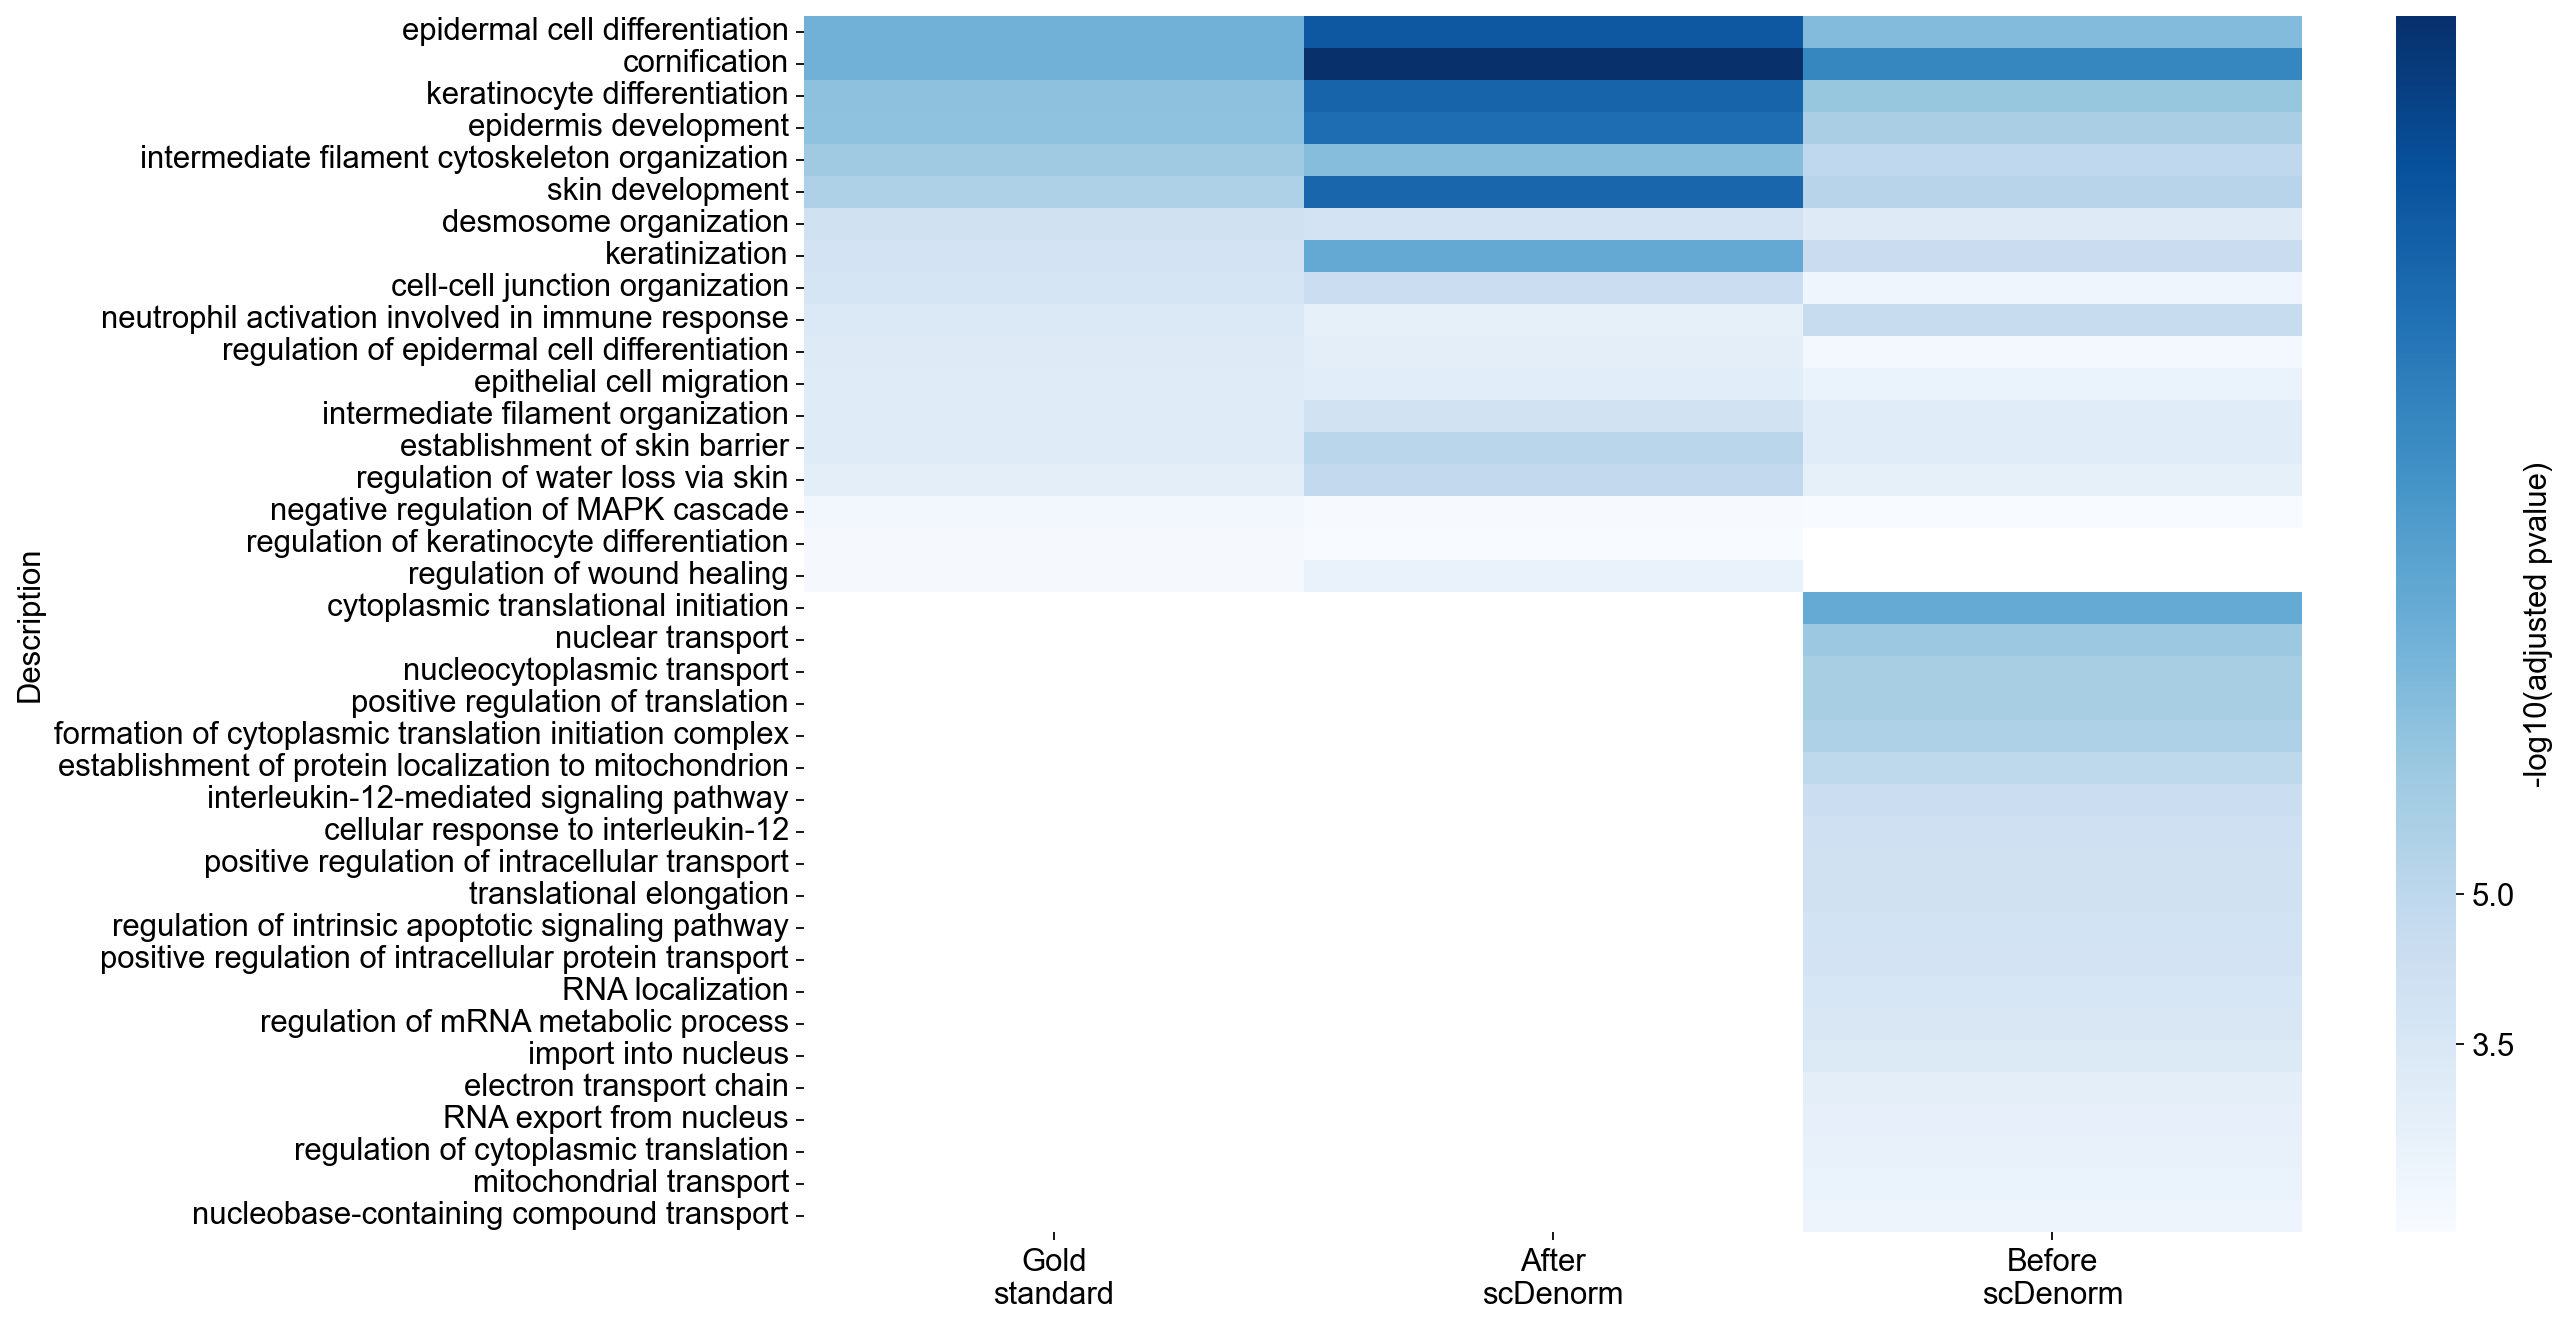

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=tmp2, cmap='Blues', cbar_kws={'label': '-log10(adjusted pvalue)', 'ticks':[1.5,3.5,5]})
plt.xticks(rotation=0)
plt.ylabel('Description')
plt.xlabel('')
plt.title('')
#plt.savefig('figures/Fig5_HSPC_enriched_GOs.pdf',dpi=300, bbox_inches='tight',transparent=True,format='pdf')